<a href="https://colab.research.google.com/github/apazacris/Online_Retail_/blob/main/Trabajo_Final_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final integrador


**Carga en CSV desde Drive**




In [ ]:
#Importación de librerias necesarias para la carga
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La ruta esta ligada a una carpeta en Drive o desde el equipo localmente

In [ ]:
# Importación de data set en una variable llamada "df" (puede ser cualquier nombre de variable que contenga el data set)
#ejemplo: df=pd.read_csv('ruta')

df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TP Curso Data Science/Online Retail.xlsx', engine='openpyxl') #add the engine parameter
#check to see if it works
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
1,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
2,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
3,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
4,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom


### **Estructura del data set y Contenido:**



Se trata de un conjunto de datos transnacional que contiene todas las transacciones que se produjeron entre el 1 de diciembre de 2010 y el 9 de diciembre de 2011 para una empresa minorista en línea sin establecimientos físicos registrada y con sede en el Reino Unido. La empresa vende principalmente regalos exclusivos para cualquier ocasión. Este tipo de Data Set me permitira tener la posibilidad de Tener diferentes focos de Analisis de acuerdo a los datos que disponga, como:

***Análisis de Ventas:***
* Total de ventas por mes o por país.
* Productos más vendidos.
* Tendencias de ventas a lo largo del tiempo.

***Segmentación de Clientes:***
* Identificación de clientes recurrentes.
* Análisis de la frecuencia de compra por cliente.

***Análisis de Producto:***
* Rentabilidad por producto.
* Productos que generan más ingresos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Comentario:** Como las columnas de ´Description´ y ´Customer ID´ en la Limpieza de datos son filas a revisar que tipo de tratamiento requeriran, eliminar, imputar o ajustar.

## **Exploración de datos**

### Diccionario

Significado de cada columna del data set cargado y sus unidades

| #  | Column       | Non-Null Count   | Dtype            | Tipo de Dato | Descripción                                                                                       |
|----|--------------|------------------|------------------|--------------|---------------------------------------------------------------------------------------------------|
| 0  | InvoiceNo    | 541909 non-null  | object           | Categórico   | Nro de factura: Número entero de 6 dígitos asignado de forma única a cada transacción. Si este código comienza con la letra "c", indica una cancelación. |
| 1  | StockCode    | 541909 non-null  | object           | Categórico   | Código de stock: Un número integral de 5 dígitos asignado de forma única a cada producto distinto                 |
| 2  | Description  | 540455 non-null  | object           | Categórico   | Descripción: Nombre del producto                                                                                |
| 3  | Quantity     | 541909 non-null  | int64            | Entero       | Cantidad: Las cantidades de cada producto (artículo) por transacción                                        |
| 4  | InvoiceDate  | 541909 non-null  | datetime64[ns]   | Fecha        | Fecha de factura: El día y la hora en que se generó cada transacción                                               |
| 5  | UnitPrice    | 541909 non-null  | float64          | Continuo     | Precio unitario: Precio del producto por unidad (libra esterlina)                                                                    |
| 6  | CustomerID   | 406829 non-null  | float64          | Categórico   | ID de cliente: Un número integral de 5 dígitos asignado exclusivamente a cada cliente                           |
| 7  | Country      | 541909 non-null  | object           | Categórico   | País: El nombre del país donde reside cada cliente.                                                     |


```
# Esto tiene formato de código
```



### **Contexto e interes del tópico elegido**
Durante varios años trabaje como Analista de Calidad, seguridad y medio ambiente, orientada a la implementación y seguimiento de procesos en base a sistemas de gestión integrados. A partir de esto desde hace 3 años estuve a cargo de gestionar, planificar y buscar el feedback de comercial-clientes a Encuestas de Satisfacción del cliente o NPS, así como la resolución de reclamos por producto no conforme. Por esto mismo este data set me parece interesante ver otro punto de vista y el analizar estos datos para predecir tendencias, patrones de compras por tipo de cliente y ver que más es posible estudiar a partir de estos datos.  



---



### Exploración y visualización (EDA): conociendo el data set

***Exploración inicial***

In [ ]:
df.head()  #muestra las primeras 5 filas del DataFrame.
df.tail()  #muestra las últimas 5 filas del DataFrame.
df.shape   #muestra las dimensiones del DataFrame (número de filas, número de columnas).
df.info()  #proporciona un resumen del DataFrame, incluidos los tipos de datos de cada columna y la cantidad de valores no nulos.
df.columns #muestra los nombres de todas las columnas en el DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
1,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
2,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
3,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
4,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
541905,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
541906,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
541907,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
541908,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


**Comentario:** InvoiceDate, puede ser convertido a tipo de fecha corta como dd/mm/aaa, dado que los horarios de compras o facturación en si puede no significar un dato relevante, debido a que no se si el data set son de tiendas fisicas u online donde funciona 24/7 o si el horario esta ajustado al de un pais o es propio de cada zona.

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Exploración estadistica de variables numericas

Exploración numerica

In [ ]:
df.describe()  #genera estadísticas descriptivas del DataFrame.
                #Esto incluye recuento, media, desviación estándar, mínimo,
                #percentil 25 (Q1), mediana (percentil 50), percentil 75 (Q3) y máximo para columnas numéricas.

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386304,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# calcular la moda
df.mode()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-10-31 14:41:00,1.25,17841.0,United Kingdom


In [ ]:
# Calcular la moda de la columna "Quantity"
quantity_mode = df['Quantity'].mode()
print(f"La moda de la columna Quantity es: {quantity_mode.iloc[0]}")

# Calcular la moda de la columna "UnitPrice"
unitprice_mode = df['UnitPrice'].mode()
print(f"La moda de la columna UnitPrice es: {unitprice_mode.iloc[0]}")


La moda de la columna Quantity es: 1
La moda de la columna UnitPrice es: 1.25


### Observación preliminar de los Datos (1)

## Cantidad (Quantity):

* **Promedio (mean): 9.55**, esto indica que, en promedio, cada transacción involucra un poco más de 9 productos.
* **Mediana (50%): 3.00**, El valor medio cuando los datos se ordenan de menor a mayor.
* **Mínimo (min): -80,995**, indica que puede haber transacciones inusuales o errores en los datos, ya que no debería haber cantidades negativas.
* **Máximo (max): 80,995**, muestra que en una transacción se pueden incluir una gran cantidad de productos. Por otro lado entre la media o promedio y los minimos y maximos es muy grande la diferencia.
* **Desviación estándar (std): 218.08**, sugiere que hay mucha variabilidad en las cantidades por transacción.

##Fecha de Factura (InvoiceDate):

El promedio de las fechas no es significativo en este contexto, pero si se puede observar que el rango de fechas abarca desde diciembre de 2010 hasta diciembre de 2011, que es correcto dado que los datos corresponden a un periodo de ventas de un año.

##Precio Unitario (UnitPrice):

* **Media-Promedio: 4.61**, indica que el precio promedio de los productos es relativamente bajo.
* **Mediana: 2.08 **,El valor medio cuando los datos se ordenan de menor a mayor.
* **Mínimo: -11,062.06**, podría indicar errores en los datos, ya que no se espera precios negativos.
* **Máximo: 38,970**, muestra que hay productos con un precio unitario muy alto, sugiriendo una amplia gama de precios.
* **Desviación estándar: 96.76**, indica una considerable variabilidad en los precios.

##ID de Cliente (CustomerID):

* **Media-Promedio: 15,287.69, al igual que la mediana y la moda**, son valores no significativos al ser un dato categorico.
* **Mínimo: 12,346 y Máximo: 18,287**, no significativo por ser un dato categorico.
* **Desviación estándar: 1,713.60**, no significativo porque es una muestra de un dato categorico, que clientes compraron ese año.

No menos importante vemos que de las columnas mostradas, todas tienen valores en sus 541909 filas, pero en la columna (CustomerID) hay menos valores, lo que puede significar falta de datos o lo que indica que no todos los registros de transacciones están asociados a un cliente único.

###**►Conclusion inicial de la primera observación de los datos**
* Los datos indican un rango considerable en las cantidades y precios, lo que sugiere que algunas transacciones pueden ser atípicas.
* La media para la columna "Cantidad" es significativamente mayor que la mediana, lo que puede indicar la presencia de valores atípicos (outliers).
* La Moda calculada para Cantidad y Precio son valores relativamente bajos, por lo que para esta transaccion o producto es la que mayor se repite en el ciclo de ventas analizado.
* En "Precio Unitario", la media también es mayor que la mediana, sugiriendo una distribución sesgada hacia la derecha.
* Es necesario investigar las cantidades negativas y precios negativos, ya que podrían representar errores de entrada de los datos.
* En general, hay una amplia variedad de productos y precios en el conjunto de datos, lo que puede ofrecer oportunidades para análisis más profundos en términos de segmentación de clientes o análisis de ventas.


Exploración visual univariado

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

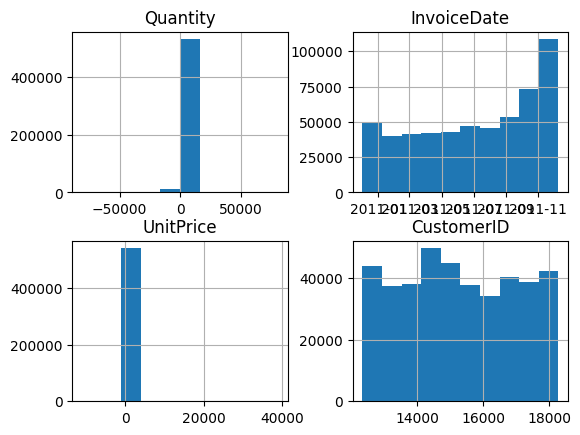

In [ ]:
df.hist() # distribución de la variable...Crea un histograma para cada columna numérica del DataFrame df.
           # Un histograma es una representación gráfica de la distribución de una variable.
           # Muestra la frecuencia de los valores en diferentes intervalos o "bins".
           # Utilidad: Permite visualizar la forma de la distribución (simétrica, asimétrica, etc.),
           #identificar la presencia de valores extremos y obtener una idea general de la dispersión de los datos.

<Axes: >

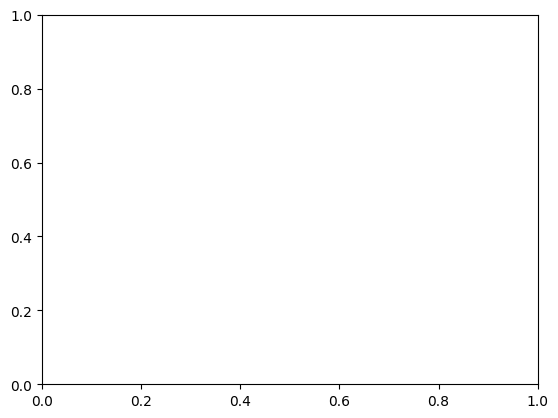

In [ ]:
sns.boxplot() #identificación de outliers

#### Observación sobre Grafico Vacio
####1. Datos faltantes (NaN - Null)
Problema: Los boxplots no se generan correctamente si hay valores NaN (Not a Number) en los datos.

Solución: Eliminar o reemplazar los valores NaN antes de graficar. En el siguiente paso se debe hacer la limpieza y manipulación de los datos correctamente para que no haya ruido en el Análisis de datos.

####2. Tipos de datos incorrectos:

Problema: sns.boxplot() espera datos numéricos. Si tienes columnas con tipo de dato object (texto), el gráfico podría no mostrarse.

Solución: Convierte las columnas relevantes a tipo numérico (int o float).

df['columna'] = pd.to_numeric(df['columna'])

####3. Problema con la sintaxis:

Problema: Si no especificas correctamente el data o los argumentos x e y , podrías obtener un gráfico vacío.
Solución: Asegúrate de pasar el DataFrame a data o especificar las columnas para x e y.

- Si quieres un boxplot para cada columna numérica:
   sns.boxplot(data=df)

   - Si quieres un boxplot para una columna específica:
   sns.boxplot(x='columna', data=df)

   - Si quieres comparar la distribución de una columna numérica
   - en función de una columna categórica:
   sns.boxplot(x='columna_categorica', y='columna_numerica', data=df)

####4. Escala de los datos:

Problema: Si hay valores atípicos (outliers) muy extremos, podrían estar "aplastando" la visualización del boxplot.
Solución: Ajustar la escala del gráfico o elimina los outliers más extremos.

- Ajustar la escala del eje y
   sns.boxplot(x='columna', data=df)
   plt.ylim(0, 100)  # Ejemplo: Limitar el eje y de 0 a 100



### Observación preliminar de los Datos (2) - Resumenes estadisticos

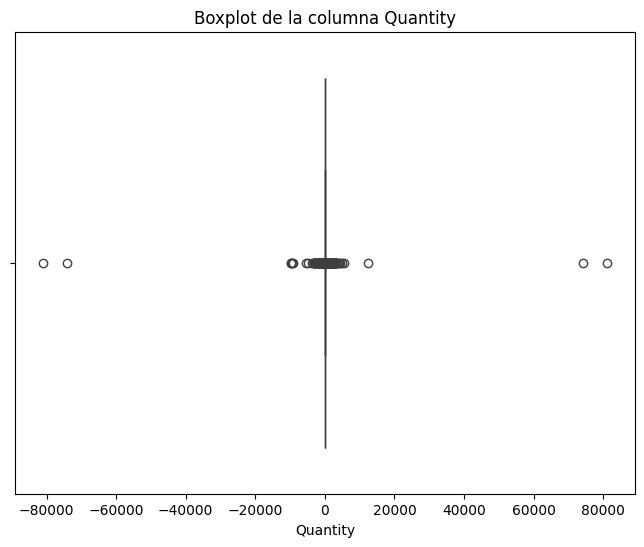

In [ ]:
# boxplot para una columna: Quantity

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
sns.boxplot(x='Quantity', data=df)
plt.title('Boxplot de la columna Quantity')
plt.xlabel('Quantity')
plt.show()


Se ven de nuevo los valores negativos en cantidad, pero se ven los outliers, en el mismo rango de valores que los valores positivos, por lo que se podria inferir que el signo negativo se pudo poner por error.


Exploración visual bivariado / multivariado:

- Para visualizar la relación entre dos variables numéricas, puedes usar gráficos de dispersión (scatter plots)
- También se pueden utilizar "gráficos de linea" para la grafica de variables vs tiempo
- Para visualizar relación entre una variable categorica y una numerica:
  Boxplots/Violin/Barras (distribución de la variable numerica por categoria de la variable categorica) Ejemplo: distribución del salario por departamento.
- Para visualizar relación entre variables de manera multiple: heatmap, matriz de correlación

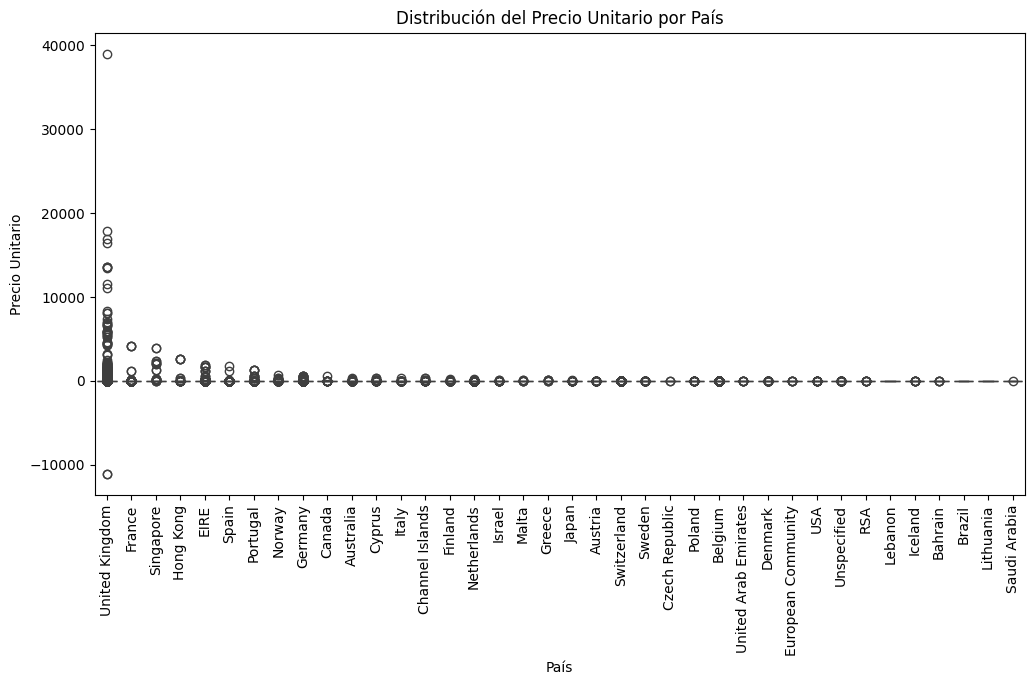

In [ ]:
# distribución entre pais y precio unitario

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df)
plt.title('Distribución del Precio Unitario por País')
plt.xlabel('País')
plt.ylabel('Precio Unitario')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


United kingdom tiene el mayor valor atipico en precio, y muy separado de los demas. Por lo que se ebera revisar si es un error, un caso especial o si es necesario mantenerlo o si se puede eliminar, si es que no es representativo para la muestra.

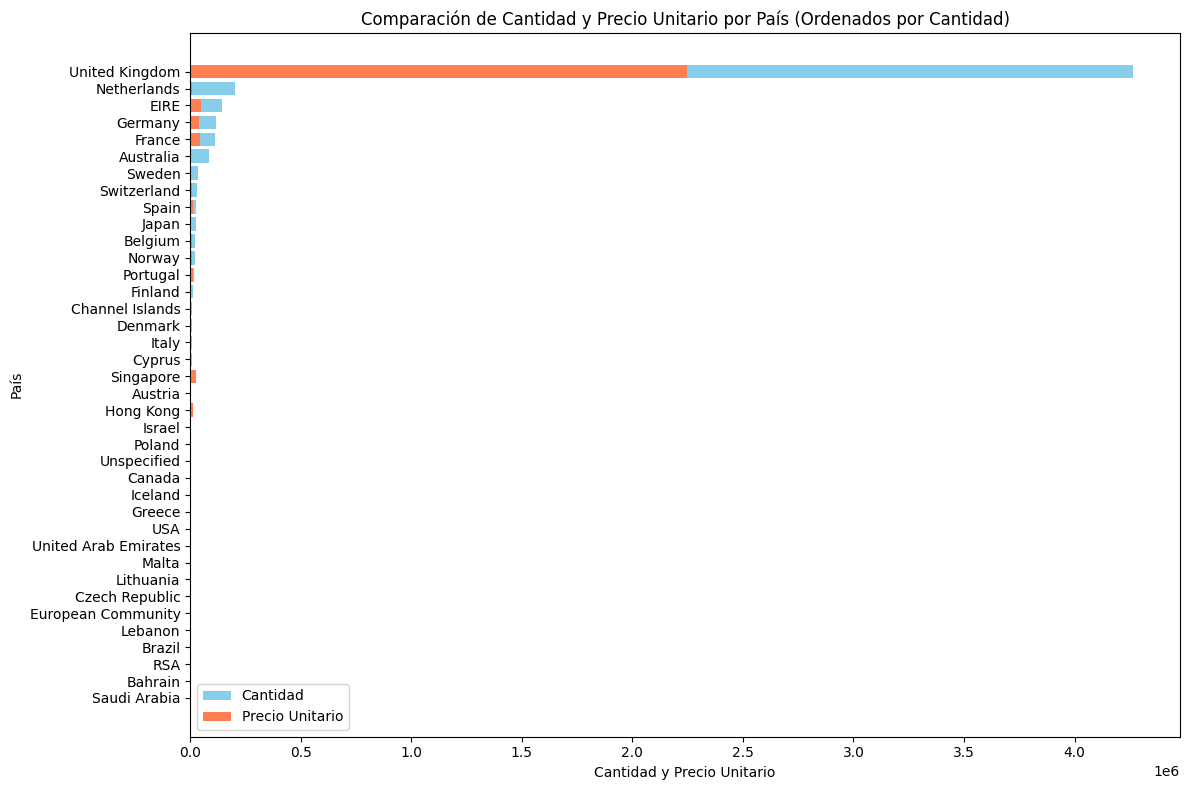

In [ ]:
# generar un grafico de barras horizontales comparando por precio y cantidades en ejes paralelos versus pais, ordenados de menor a mayor

import matplotlib.pyplot as plt

# Agrupar los datos por país y calcular la suma de la cantidad y el precio unitario
country_data = df.groupby('Country').agg({'Quantity': 'sum', 'UnitPrice': 'sum'})

# Ordenar los datos por cantidad de menor a mayor
country_data_sorted = country_data.sort_values('Quantity')

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(country_data_sorted.index, country_data_sorted['Quantity'], label='Cantidad', color='skyblue')
plt.barh(country_data_sorted.index, country_data_sorted['UnitPrice'], label='Precio Unitario', color='coral')
plt.xlabel('Cantidad y Precio Unitario')
plt.ylabel('País')
plt.title('Comparación de Cantidad y Precio Unitario por País (Ordenados por Cantidad)')
plt.legend()
plt.tight_layout()
plt.show()


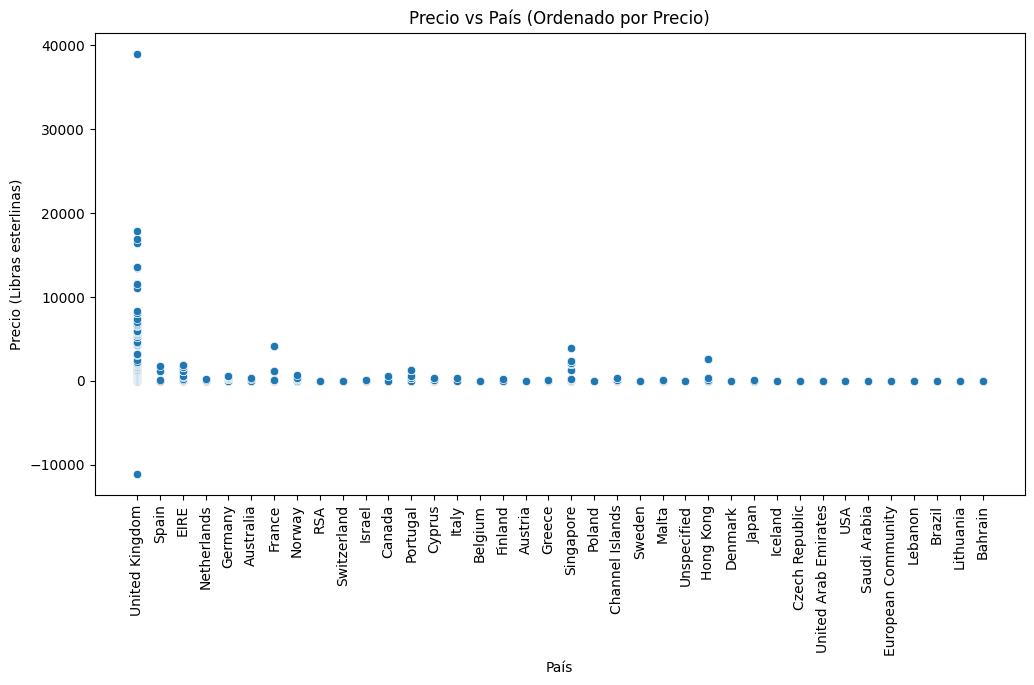

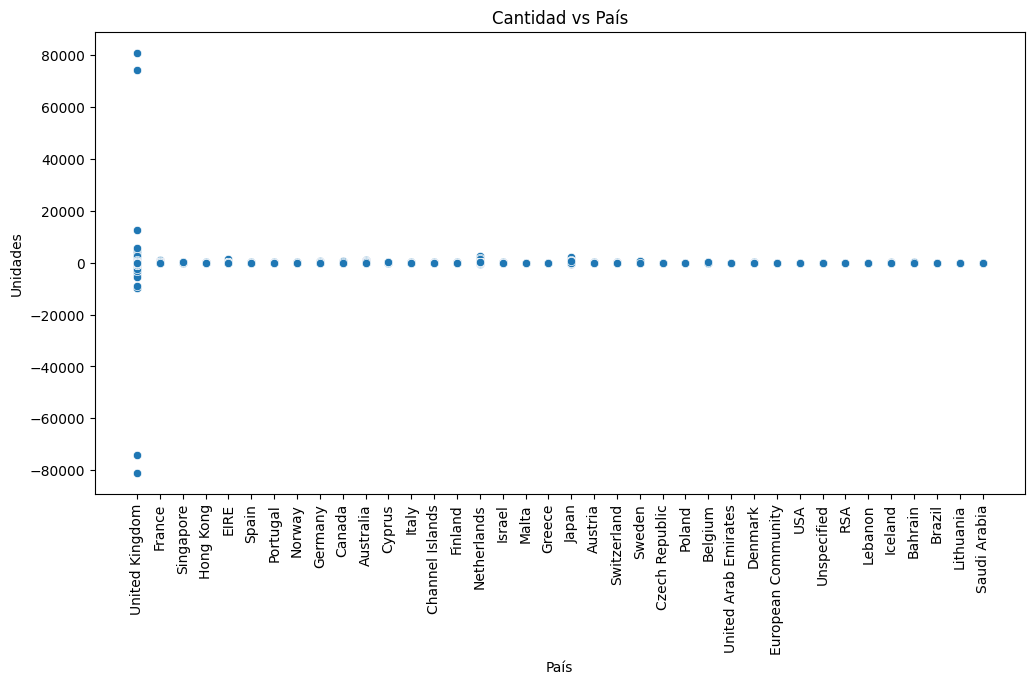

In [ ]:
# Gráfico de dispersión: Precio vs País (ordenado por precio)
plt.figure(figsize=(12, 6))
df_sorted_by_price = df.sort_values('UnitPrice')
sns.scatterplot(x='Country', y='UnitPrice', data=df_sorted_by_price)
plt.xlabel('País')
plt.ylabel('Precio (Libras esterlinas)')
plt.title('Precio vs País (Ordenado por Precio)')
plt.xticks(rotation=90)
plt.show()

# Gráfico de dispersión: Cantidad vs País
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Country', y='Quantity', data=df)
plt.xlabel('País')
plt.ylabel('Unidades')
plt.title('Cantidad vs País')
plt.xticks(rotation=90)
plt.show()

**Comentario**: En una visualización de tipo Grafico de barras no es una visualizacion objetiva de los datos, dado que aun no se corrigieron los valores negativos que aparecen tanto en Unit Price como en Quantity del data set. Por otro lado en los graficos de dispercion de las dos columnas numericas mencionadas se puede ver claramente, aparte de los valores negativos, que el País de United Kingdom es el que tiene Precios Unitarios mas altos, si es que estos son correctos, o bien tiene los valores atipicos más significativos, los cuales hay que determinar el accionar posterior de estos.
 Por otro lado, si quiero analizar más información que la brindada por el dataset seleccionado necesito saber la facturación real, la cual deriva de multiplicar la columna "Quantity" por la de "Unit Price".

### Exploración estadistica de variables categoricas

Exploración numerica

In [ ]:
df['Quantity'].value_counts()

,count
Quantity,
1,148227
2,81829
12,61063
6,40868
4,38484
...,...
-74215,1
1400,1
141,1


In [ ]:
df['UnitPrice'].value_counts()

,count
UnitPrice,
1.25,50496
1.65,38181
0.85,28497
2.95,27768
0.42,24533
...,...
179.67,1
179.94,1
180.17,1


**Comentario:** Tengo 1630 diferentes precios en ´UnitPrice´ lo cual significa que deberia tener 1630 productos diferentes en ´Description´ o más, dado que el mismo precio unitario puede ser el mismo para más de un tipo de producto, ya sea por modelo, color o que es un producto totalmente diferente pero con el mismo precio que otro.

#### ( a Editar) Exploración visual: countplots, piechart, grafico de barras

In [ ]:
# Contar la cantidad de productos diferentes en la columna 'Description'
num_different_products = df['Description'].nunique()

print(f"La cantidad de productos diferentes es: {num_different_products}")

La cantidad de productos diferentes es: 4223


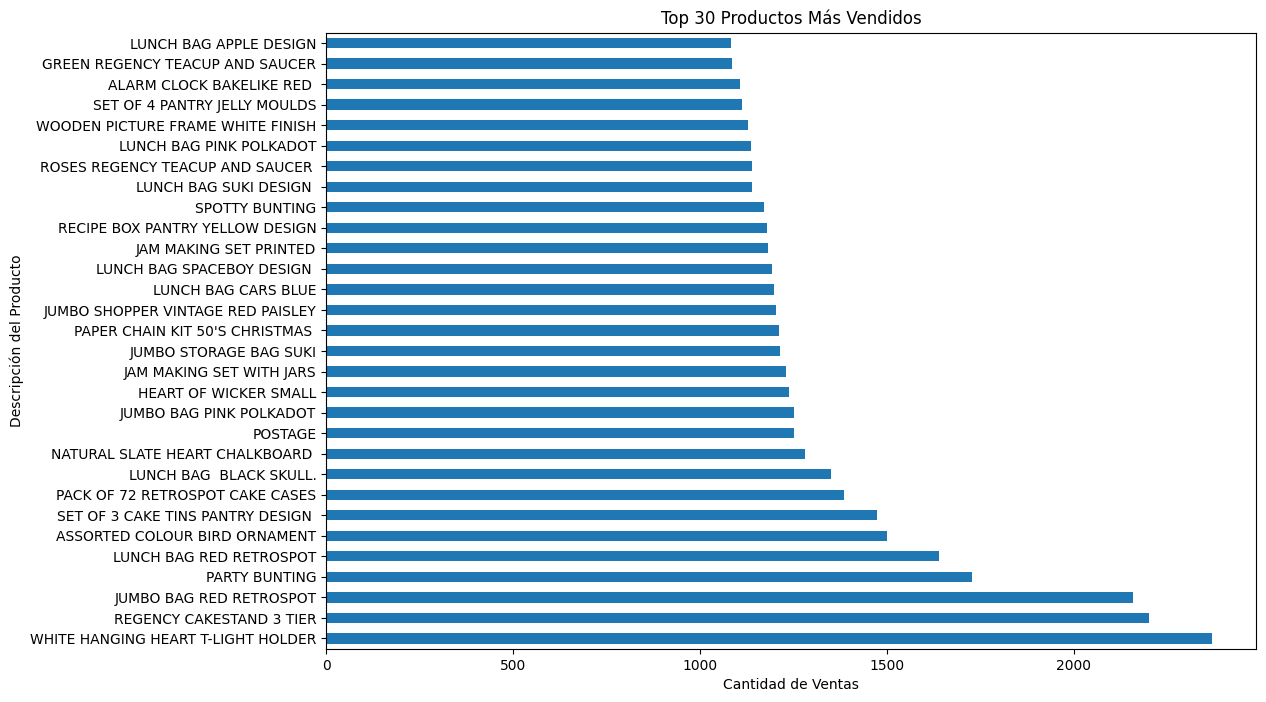

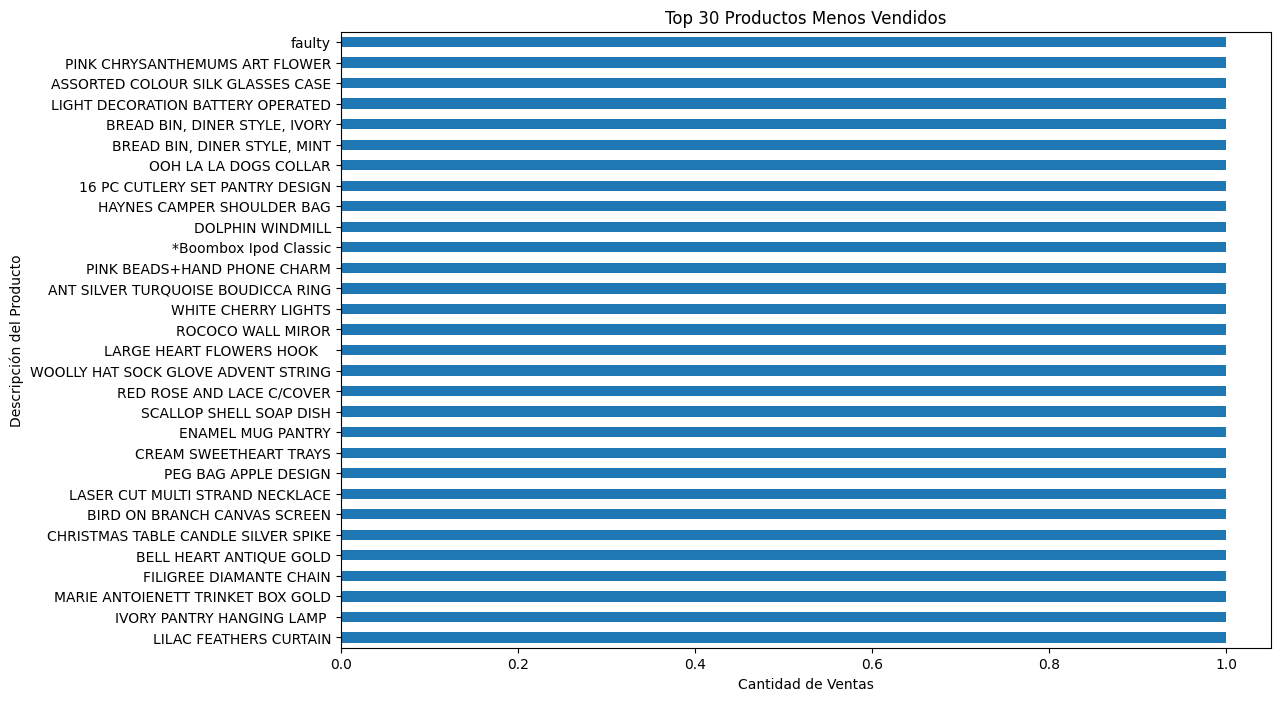

In [ ]:
# Contar la cantidad de productos diferentes y ordenarlos por frecuencia
product_counts = df['Description'].value_counts()

# Mostrar los 30 productos más vendidos
top_30_products = product_counts.head(30)
plt.figure(figsize=(12, 8))
top_30_products.plot(kind='barh')
plt.title('Top 30 Productos Más Vendidos')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Descripción del Producto')
plt.show()

# Mostrar los 30 productos menos vendidos
bottom_30_products = product_counts.tail(30)
plt.figure(figsize=(12, 8))
bottom_30_products.plot(kind='barh')
plt.title('Top 30 Productos Menos Vendidos')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Descripción del Producto')
plt.show()

**Comentario:** Al ampliar un poco mis Tops productos más y menos vendidos, puedo ver claramente que en data set hay cargas que no son especificamente de una transacción de venta, sino correcciones o ingresos erroneos que se dejaron tal cual y se asignaron como una facturación. Otra observación que puedo dar es que almenos en ´Description´ se puede asumir que todos los productos que estan detallados en mayuscula se ingresaron correctamente, a partir de esta visualización preliminar.

## Limpieza de datos

###### **Manejo de duplicados**

In [ ]:
# Verificar duplicados
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

       InvoiceNo StockCode                    Description  Quantity  \
4620      578949     22802       FAUX FUR CHOCOLATE THROW         1   
5826      579744     23010    CIRCUS PARADE BABY GIFT SET         1   
5945      574311     22946   WOODEN ADVENT CALENDAR CREAM         1   
5955      574080     23008       DOLLY GIRL BABY GIFT SET         1   
6230      564843     23008       DOLLY GIRL BABY GIFT SET         1   
...          ...       ...                            ...       ...   
540479    558340     22627            MINT KITCHEN SCALES         1   
540482    558340     22430      ENAMEL WATERING CAN CREAM         1   
540728    553521     22684  FRENCH BLUE METAL DOOR SIGN 9         2   
541673    539856     22518       CHILDS GARDEN BRUSH BLUE         1   
541807    537534     22520     CHILDS GARDEN TROWEL BLUE          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
4620   2011-11-27 14:30:00      19.95     14954.0  United Kingdom  
5826   2011

**Comentario:** Hay 5268 filas duplicadas, se eliminaran del Dataframe dado que no es una cantidad significativa y estos pueden sesgar mis datos si quisiera trabajar con zonas con menor numero de ventas.

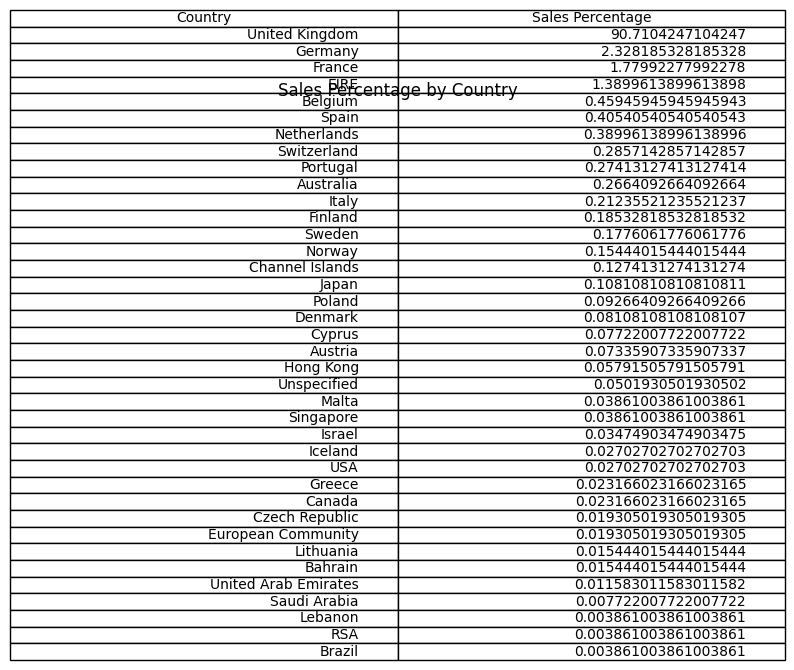

In [ ]:
# grafico tipo tabla el Porcentaje de Ventas por País en porcentaje, ordenado de mayor a menor, de acuerdo a las columnas Country y InvoiceNo

# Calculate total sales per country
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Calculate the percentage of sales for each country
country_sales_percentage = (country_sales / country_sales.sum()) * 100

# Create a table-like plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.table(cellText=country_sales_percentage.reset_index().values,
          colLabels=['Country', 'Sales Percentage'],
          loc='center')
ax.axis('off')
plt.title('Sales Percentage by Country')
plt.show()

**Comentario:** de los datos duplicados, es de esperarse que todas las columnas tengan sus propios valores repetidos por el tipo de data set. En cambio el grafico de tabla anterior podemos ver que el 90% de las transacciones se realizan en United Kingdom, el cual es el principal país donde tambien se identificaron outliers.

In [ ]:
#  contar la cantidad de filas existentes en el data set df actual

num_rows = df.shape[0]
print(f"El dataset actual df tiene {num_rows} rows.")

El dataset actual df tiene 541909 rows.


In [ ]:
# renombrar el data set df como df1 para saber que es la primer accion de limpieza y version 1 del data set.

df1 = df.copy()

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
#cantidad de filas de df1

num_rows_df1 = df1.shape[0]
print(f"df1 has {num_rows_df1} rows.")

df1 has 536641 rows.


Comentario: Se han eliminado las 5268 filas duplicadas detectadas.

######**Manejo de Filas o Columnas con Valores Nulos**

In [ ]:
# Verificar la cantidad de valores nulos por columna
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


Comentario: Como se habia mencionado al principio, tanto ´Description´y ´CustomerID´tienen valores nulos a lo largo del data set.

In [ ]:

# Contar la cantidad de valores con valor 0 en la columna UnitPrice
cantidad_cero_unitprice = (df1['UnitPrice'] == 0).sum()

print(f"La cantidad de valores con valor 0 en la columna UnitPrice es: {cantidad_cero_unitprice}")

La cantidad de valores con valor 0 en la columna UnitPrice es: 2510


In [ ]:
# Mostrar porcentaje de valores nulos por columna

null_percentage = (df1.isnull().sum() / len(df1)) * 100

# Print the result
print(null_percentage)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


**Comentario:** en el data set si bien solo aparece dos columnas con valores nulos, es solo porque estan vacios, pero en la columna UnitPrice existian valores con valor 0.0 "cero", o costo cero lo cual asumo que es un error y se eliminaran. Dado que por el momento es mas practico que bscar imputar un valor el cual es mas difil predecir si no hay referencia del tipo de producto que es ya que en Description es un valor NaN.

In [ ]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
1,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
2,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
3,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
4,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541904,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
541905,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
541906,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
541907,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
# cantidad de veces que en mi data frame df1 se cumple que la fila de Description es NaN o de valor nulo o vacio y que Unit price tiene asignado valor 0.0 o cero

count = df1[(df1['Description'].isnull()) & (df1['UnitPrice'] == 0.0)].shape[0]

print(f"Cantidad de filas donde Description es NaN, nulo o vacío y UnitPrice es 0.0: {count}")

Cantidad de filas donde Description es NaN, nulo o vacío y UnitPrice es 0.0: 1454


In [ ]:
# Segunda version de mi data frame para dar inicio a la segunda limpieza: manejo de datos nulos.
df2 = df1.copy()

In [ ]:
# Eliminar filas con valores en 0 en la columna UnitPrice y NaN en Description
df2 = df2.dropna(subset=['Description'], how='any')
df2 = df2[df2['UnitPrice'] != 0.0]

In [ ]:
# numero de filas en df2

num_rows_df2 = df2.shape[0]
print(f"df2 has {num_rows_df2} rows.")

df2 has 534131 rows.


**Comentario:** Las filas eliminadas de 1454 pasaron a ser 2510, casi un 73% mas de lo calculado, pero respecto a las 536641 filas que se mantenian en el df1, estas filas eliminadas por valores nulos solo representan el 0,46% del data set. Por lo que se mantendra esa limpieza.

In [ ]:
#Reviso las filas eliminadas
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534131 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534131 non-null  object        
 1   StockCode    534131 non-null  object        
 2   Description  534131 non-null  object        
 3   Quantity     534131 non-null  int64         
 4   InvoiceDate  534131 non-null  datetime64[ns]
 5   UnitPrice    534131 non-null  float64       
 6   CustomerID   401564 non-null  float64       
 7   Country      534131 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


**Comentario:** Ya no tengo valores nulos en la columna Description, pero si en Customer ID. Además debo definir si las transacciones que claramente no son ventas son necesario mantenerlas o no, asi como aquellas consideradas como valores atipicos, por errores de registro o por ser ouliers que no son representativos para este analisis.


Nueva Columna TotalInvoice

In [ ]:
# gregar una columna al data set df, la nueva columna es el producto entre Quantity y UnitPrice, la nueva columna se llamara Totalinvoiced con el mismo formato de la columna UnitPrice de solo dos digitos

df2['TotalInvoiced'] = df2['Quantity'] * df2['UnitPrice']

# Formatear la columna 'TotalInvoiced' para que tenga solo dos decimales,
# igual que la columna 'UnitPrice'.
df2['TotalInvoiced'] = df2['TotalInvoiced'].round(2)

print(df2)

       InvoiceNo  StockCode                 Description  Quantity  \
0        C556445          M                      Manual        -1   
1        C580605  AMAZONFEE                  AMAZON FEE        -1   
2        C540117  AMAZONFEE                  AMAZON FEE        -1   
3        C540118  AMAZONFEE                  AMAZON FEE        -1   
4        C537651  AMAZONFEE                  AMAZON FEE        -1   
...          ...        ...                         ...       ...   
539389    568200       PADS  PADS TO MATCH ALL CUSHIONS         1   
539390    561226       PADS  PADS TO MATCH ALL CUSHIONS         1   
539391    550193       PADS  PADS TO MATCH ALL CUSHIONS         1   
541907   A563187          B             Adjust bad debt         1   
541908   A563186          B             Adjust bad debt         1   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2011-06-10 15:31:00  38970.000     15098.0  United Kingdom   
1      2011-12-05 11:36:00  17836

<ipython-input-46-53e7e4435436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalInvoiced'] = df2['Quantity'] * df2['UnitPrice']
<ipython-input-46-53e7e4435436>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalInvoiced'] = df2['TotalInvoiced'].round(2)


In [ ]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalInvoiced
0,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.000,15098.0,United Kingdom,-38970.00
1,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.460,NaN,United Kingdom,-17836.46
2,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.020,NaN,United Kingdom,-16888.02
3,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.710,NaN,United Kingdom,-16453.71
4,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.330,NaN,United Kingdom,-13541.33
...,...,...,...,...,...,...,...,...,...
539389,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.00
539390,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.00
539391,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.00
541907,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.060,NaN,United Kingdom,-11062.06


**Comentario:** despues de ver la tabla de df2, y visualizandola en orden ascendente o decendente de la columna TotalInvoice, y viendo que a su vez todos los valores de la columna InvoiceNo empiezan con una letra C, se asume que son Notas de Credito por compras canceladas o devoluciones entre otros casos.

###### Observación y acción p/ valores negativos

In [ ]:
# Contar la cantidad de veces que InvoiceNo comienza con "C" en df2
count_c_invoice = df2[df2['InvoiceNo'].str.startswith('C', na=False)].shape[0]

print(f"La cantidad de veces que InvoiceNo comienza con 'C' en df2 es: {count_c_invoice}")

La cantidad de veces que InvoiceNo comienza con 'C' en df2 es: 9251


In [ ]:
# Contar la cantidad de veces que InvoiceNo comienza con una letra en df2
count_letter_invoice = df2[df2['InvoiceNo'].str.match(r'^[a-zA-Z]', na=False)].shape[0]

print(f"La cantidad de veces que InvoiceNo comienza con una letra en df2 es: {count_letter_invoice}")

La cantidad de veces que InvoiceNo comienza con una letra en df2 es: 9254


In [ ]:
# Mostrar las filas de df2 donde los valores de InvoiceNo empiezan con una letra
rows_with_letter_invoice = df2[df2['InvoiceNo'].str.match(r'^[a-zA-Z]', na=False)]
print(rows_with_letter_invoice)

       InvoiceNo  StockCode                          Description  Quantity  \
0        C556445          M                               Manual        -1   
1        C580605  AMAZONFEE                           AMAZON FEE        -1   
2        C540117  AMAZONFEE                           AMAZON FEE        -1   
3        C540118  AMAZONFEE                           AMAZON FEE        -1   
4        C537651  AMAZONFEE                           AMAZON FEE        -1   
...          ...        ...                                  ...       ...   
539385   C552569          D                             Discount      -240   
539386   C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
539387   C545478          D                             Discount      -720   
541907   A563187          B                      Adjust bad debt         1   
541908   A563186          B                      Adjust bad debt         1   

               InvoiceDate  UnitPrice  CustomerID         Count

In [ ]:
# Mostrar las filas de df2 donde InvoiceNo comienza con una letra que no sea 'C'
rows_with_other_letter_invoice = df2[df2['InvoiceNo'].str.match(r'^[A-Za-z]', na=False) & ~df2['InvoiceNo'].str.startswith('C', na=False)]
print(rows_with_other_letter_invoice)

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
9        A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
541907   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   
541908   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   

        UnitPrice  CustomerID         Country  TotalInvoiced  
9        11062.06         NaN  United Kingdom       11062.06  
541907  -11062.06         NaN  United Kingdom      -11062.06  
541908  -11062.06         NaN  United Kingdom      -11062.06  


***Comentario:*** Luego de previsualizar las Filas de InvoiceNo con valores negativos y que estos estan referenciados con C o A, se los complempla como ajustes. Para este analisis se eliminaran dado que representan un porcentaje menor al 1,75% del Data set df2. Para la siguiente limpieza se eliminaran dichas filas y el data set pasa a su tercer version: df3.

In [ ]:
#renombrar df2 a df3

df3 = df2.copy()

In [ ]:
# Eliminar filas donde InvoiceNo comienza con una letra
df3 = df3[~df3['InvoiceNo'].str.match(r'^[A-Za-z]', na=False)]

num_rows_df3 = df3.shape[0]
print(f"df3 has {num_rows_df3} rows.")

df3 has 524877 rows.


###### **Imputar Valores Nulos**

In [ ]:
# Contar la cantidad de valores NaN en la columna 'Customer ID'
cantidad_nan_customer_id = df3['CustomerID'].isnull().sum()

print(f"La cantidad de valores NaN en la columna 'Customer ID' es: {cantidad_nan_customer_id}")

La cantidad de valores NaN en la columna 'Customer ID' es: 132185


In [ ]:
# A partir de las 132185 celdas con valor NaN de Customer ID calcular la cantidad de valores diferentes de la columna InvoiceNo

# para 'CustomerID' is NaN
df3_nan_customer_id = df3[df3['CustomerID'].isnull()]

# Calculate the number of unique values in the 'InvoiceNo' column for the filtered DataFrame
unique_invoice_numbers = df3_nan_customer_id['InvoiceNo'].nunique()

print(f"La cantidad de valores diferentes de la columna InvoiceNo para las filas con CustomerID NaN es: {unique_invoice_numbers}")

La cantidad de valores diferentes de la columna InvoiceNo para las filas con CustomerID NaN es: 1427


**Comentario:** Para los valores NaN en la columna CustomerID podria asignar un valor o texto como "No Registrado" asiendo referencia a que no se registro el numero de cliente en esa transacción, y segun podemos ver de los ultimos 2 codigos ejecutados, hay 1.427 transacciones o facturas, lo que podia implicar 1427 clientes, para 132.185 productos diferentes vendidos.

In [ ]:
# Calculate the number of unique values in the 'InvoiceNo' column
num_different_invoice_numbers = df3['InvoiceNo'].nunique()

print(f"La cantidad de valores diferentes en la columna InvoiceNo es: {num_different_invoice_numbers}")

La cantidad de valores diferentes en la columna InvoiceNo es: 19959


**Comentario:** Si calculamos la relación entre la cantidad de Transacciones de InvoiceNo repecto a aquellos que no tienen un Customer ID asignado estamos hablando de aprox. un 7% (1424/19959) de transacciones realizadas registradas en el data set del ultimo año.

In [ ]:
#Teniendo en cuanta la facturación:
# Suma de TotalInvoice en filas con NaN en CustomerID
sum_total_invoice_nan_customerid = df3[df3['CustomerID'].isnull()]['TotalInvoiced'].sum()

# Suma total de TotalInvoiced
total_sum_total_invoiced = df3['TotalInvoiced'].sum()

# Comparación
print(f"Suma de TotalInvoice para filas con CustomerID NaN: {sum_total_invoice_nan_customerid} libras esterlinas")
print(f"Suma total de TotalInvoiced: {total_sum_total_invoiced} libras esterlinas")

# Diferencia en Porcentaje
# compared to the total sum of TotalInvoiced.
percentage_nan_customerid = (sum_total_invoice_nan_customerid / total_sum_total_invoiced) * 100

print(f"Porcentaje de la suma de TotalInvoice con CustomerID NaN respecto al total: {percentage_nan_customerid:.2f}%")

Suma de TotalInvoice para filas con CustomerID NaN: 1743839.8499999996 libras esterlinas
Suma total de TotalInvoiced: 10631048.739999998 libras esterlinas
Porcentaje de la suma de TotalInvoice con CustomerID NaN respecto al total: 16.40%


**Comentario:** Desde el punto de vista monetario esas transacciones sin un Cliente asignado contemplan casi el 17% de la facturación anual. Al momento aun no se requiere asignar un valor a esos Valores Nan para el Analisis de datos, en CustomerID.



---



##### Manejo de datos Outliers

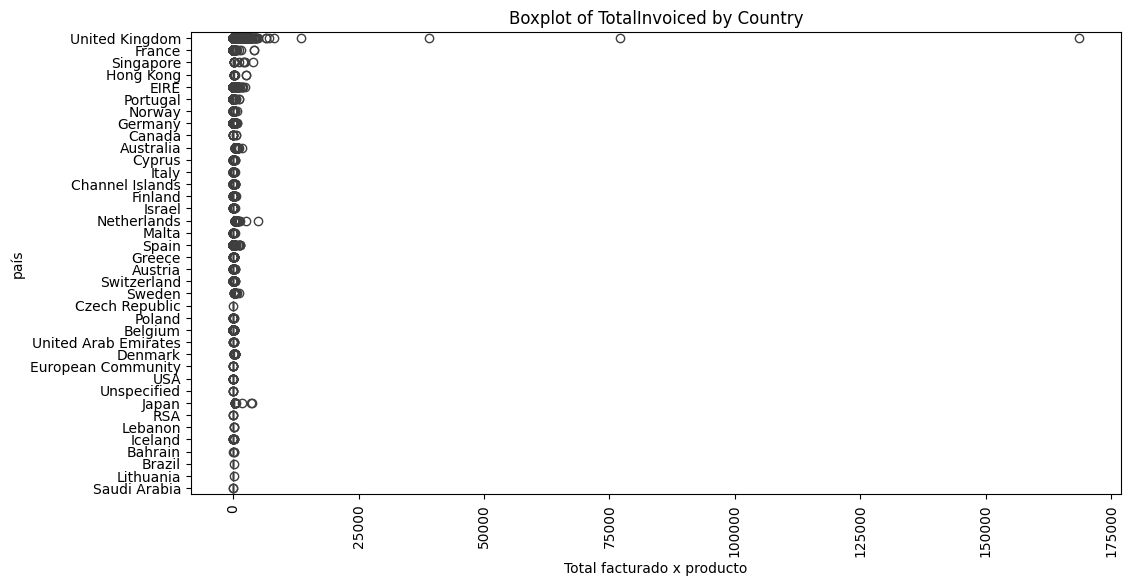

In [ ]:
#  boxplot por totalinvoice por pais

plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalInvoiced', y='Country', data=df3)
plt.title('Boxplot of TotalInvoiced by Country')
plt.xlabel('Total facturado x producto')
plt.ylabel('país')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalInvoiced
count,524877.000000,524877,524877.000000,392692.000000,524877.000000
mean,10.616619,2011-07-04 15:30:09.901862912,3.901505,15287.843865,20.254362
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.280179,NaN,32.706800,1713.539549,271.266011


**Comentario:** considero que tanto Quantity como TotalInvoice tienen una Desviación std alta.

In [ ]:
#Identificar outliers de acuerdo al Total facturado por linea
Q1 = df3['TotalInvoiced'].quantile(0.25)
Q3 = df3['TotalInvoiced'].quantile(0.75)
IQR = Q3 - Q1
outliers = df3[(df3['TotalInvoiced'] < (Q1 - 1.5 * IQR)) | (df3['TotalInvoiced'] > (Q3 + 1.5 * IQR))]
print(outliers)

       InvoiceNo  StockCode                          Description  Quantity  \
5         537632  AMAZONFEE                           AMAZON FEE         1   
11        551697       POST                              POSTAGE         1   
34        562955        DOT                       DOTCOM POSTAGE         1   
36        560373          M                               Manual         1   
38        573080          M                               Manual         1   
...          ...        ...                                  ...       ...   
539193    569214      15034          PAPER POCKET TRAVELING FAN       1200   
539196    556267      15034          PAPER POCKET TRAVELING FAN       1200   
539285    560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
539307    556267      16216        LETTER SHAPE PENCIL SHARPENER      1600   
539317    544152      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      2400   

               InvoiceDate  UnitPrice  CustomerID         Count

In [ ]:
#Identificar outliers de acuerdo a Quantity
Q1 = df3['Quantity'].quantile(0.25)
Q3 = df3['Quantity'].quantile(0.75)
IQR = Q3 - Q1
outliers = df3[(df3['Quantity'] < (Q1 - 1.5 * IQR)) | (df3['Quantity'] > (Q3 + 1.5 * IQR))]
print(outliers)

       InvoiceNo StockCode                     Description  Quantity  \
186       556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
2024      537659     22833     HALL CABINET WITH 3 DRAWERS        72   
2415      539750     22423        REGENCY CAKESTAND 3 TIER        79   
2473      538877     22423        REGENCY CAKESTAND 3 TIER        52   
2481      538351     22423        REGENCY CAKESTAND 3 TIER        38   
...          ...       ...                             ...       ...   
539379    557057     16045      POPART WOODEN PENCILS ASST       100   
539380    557009     16045      POPART WOODEN PENCILS ASST       100   
539381    557006     16045      POPART WOODEN PENCILS ASST       100   
539382    556267     16045      POPART WOODEN PENCILS ASST       500   
539383    555876     16045      POPART WOODEN PENCILS ASST       100   

               InvoiceDate  UnitPrice  CustomerID         Country  \
186    2011-06-10 15:28:00     649.50     15098.0  United Kingdom 

**Comentario:** Tal cual el grafico boxplot en la primer sentencia de Manejo de outliers, hay varios claramente en United Kimgdom y de acuerdo al analisis IQR podemos ver a Francia como otro país con algun valor atipico.

En primera instancia para manejar esos valores atipicos observando los maximos de la visualizacion estadistica: Precio Unitario y con la cantidad más alejada de la media de la columna Quantity, la cual esta ultima como Total Invoice tambien la que tenia mayor dispercion de acuerdo a la desviacion estandar.

In [ ]:
#renombrar df3 a df4 para iniciar la limpieza de acuerdo a los valores atipicos mas relevantes
df4 = df3.copy()

In [ ]:
#  Eliminar la fila con el valor maximo en la columna Quantity

df4 = df4[df4.Quantity != df4.Quantity.max()]

In [ ]:
df4.describe() #la dispersión de Quantity disminuyo

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalInvoiced
count,524876.000000,524876,524876.000000,392691.000000,524876.000000
mean,10.462326,2011-07-04 15:29:43.936320256,3.901508,15287.840916,19.933430
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,17.700000
max,74215.000000,2011-12-09 12:50:00,13541.330000,18287.000000,77183.600000
std,109.216379,NaN,32.706831,1713.540734,139.729913


In [ ]:
# Eliminar la fila del data set df4 la fila con el valor maximo de Unit Price

row_index_to_drop = df4['UnitPrice'].idxmax()

# Elimina la fila con ese índice
df4 = df4.drop(row_index_to_drop)

In [ ]:
# Eliminar la fila del data set df4 la fila con el valor maximo de totalinvoiced

# Find the index of the row with the maximum value in 'TotalInvoiced'
row_index_to_drop = df4['TotalInvoiced'].idxmax()

# Drop the row with that index
df4 = df4.drop(row_index_to_drop)

In [ ]:
df4.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalInvoiced
count,524874.000000,524874,524874.000000,392690.000000,524874.000000
mean,10.320968,2011-07-04 15:30:45.870094848,3.875722,15287.848407,19.760655
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,17.700000
max,4800.000000,2011-12-09 12:50:00,8142.750000,18287.000000,38970.000000
std,37.914233,NaN,26.843721,1713.536485,88.498742


Comentario: Solo eliminando 3 filas la dispersion de los datos mejoro significativamente.

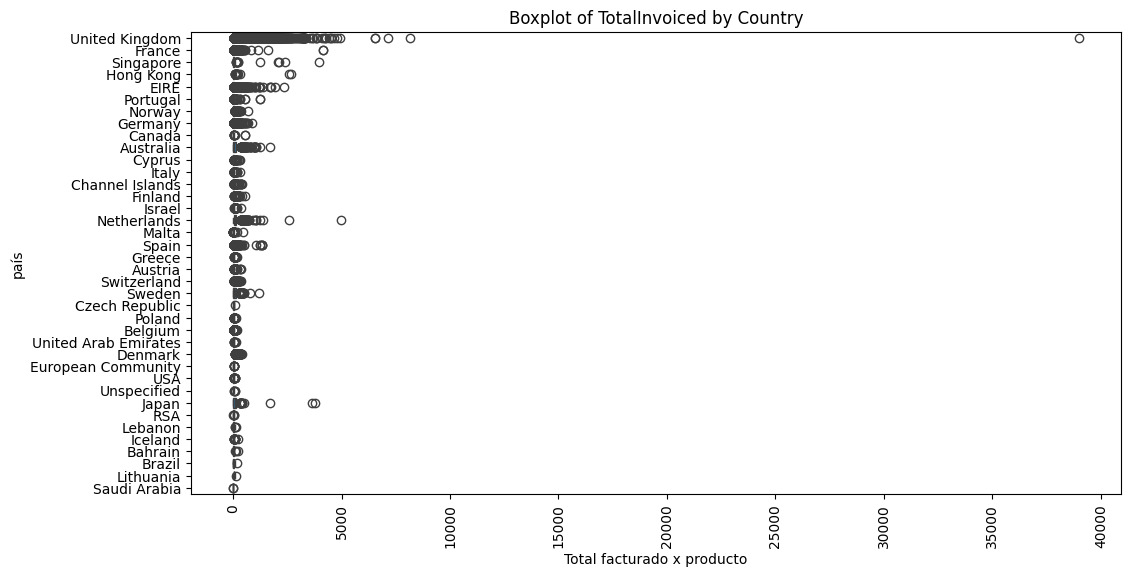

In [ ]:
#  boxplot por totalinvoice por pais

plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalInvoiced', y='Country', data=df4)
plt.title('Boxplot of TotalInvoiced by Country')
plt.xlabel('Total facturado x producto')
plt.ylabel('país')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Las 10 filas con los valores maximos de totalinvoice (dado que cobnsidero que es el dato mas relevante para analizar el tratamiento para los valores atipicos de acuerdo a las ventas realizadas)

top_10_total_invoice = df4.nlargest(10, 'TotalInvoiced')
print(top_10_total_invoice)

       InvoiceNo StockCode                          Description  Quantity  \
186       556444     22502       PICNIC BASKET WICKER 60 PIECES        60   
11        551697      POST                              POSTAGE         1   
87259     567423     23243  SET OF TEA COFFEE SUGAR TINS PANTRY      1412   
263266    550461     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
267104    540815     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
274516    573003     23084                   RABBIT NIGHT LIGHT      2400   
227446    540815    85123A   WHITE HANGING HEART T-LIGHT HOLDER      1930   
61733     576365     22086      PAPER CHAIN KIT 50'S CHRISTMAS        688   
250378    550461    85123A   WHITE HANGING HEART T-LIGHT HOLDER      1930   
65167     540818     48185                   DOORMAT FAIRY CAKE       670   

               InvoiceDate  UnitPrice  CustomerID         Country  \
186    2011-06-10 15:28:00     649.50     15098.0  United Kingdom   
11     2011-05

Tal cual la grafica de dispersión hay un solo valor que se aleja completamente de la media de totalInvoice.

In [ ]:
# mostar las filas que contengan 556444 en InvoiceNo en mi data frame d4

rows_with_556444 = df4[df4['InvoiceNo'].astype(str).str.contains('556444')]
print(rows_with_556444)

    InvoiceNo StockCode                     Description  Quantity  \
186    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalInvoiced  
186 2011-06-10 15:28:00      649.5     15098.0  United Kingdom        38970.0  


In [ ]:
#  mostrar las filas de producto vendido que contengan en Desription : PICNIC BASKET WICKER 60 PIECES

# Filtrar las filas donde la columna 'Description' contiene 'PICNIC BASKET WICKER 60 PIECES'
rows_with_picnic_basket = df4[df4['Description'].str.contains('PICNIC BASKET WICKER 60 PIECES', na=False)]

# Imprimir las filas filtradas
print(rows_with_picnic_basket)

    InvoiceNo StockCode                     Description  Quantity  \
185    556446     22502  PICNIC BASKET WICKER 60 PIECES         1   
186    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalInvoiced  
185 2011-06-10 15:33:00      649.5     15098.0  United Kingdom          649.5  
186 2011-06-10 15:28:00      649.5     15098.0  United Kingdom        38970.0  


In [ ]:
df4.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalInvoiced
count,524874.000000,524874,524874.000000,392690.000000,524874.000000
mean,10.320968,2011-07-04 15:30:45.870094848,3.875722,15287.848407,19.760655
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,17.700000
max,4800.000000,2011-12-09 12:50:00,8142.750000,18287.000000,38970.000000
std,37.914233,NaN,26.843721,1713.536485,88.498742


In [ ]:
#  mostrar las filas con un precio unitario mayor a 200 en UnitPrice

# Mostrar las filas con un precio unitario mayor a 200
rows_with_unitprice_greater_than_200 = df4[df4['UnitPrice'] > 200]
print(rows_with_unitprice_greater_than_200)

    InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
11     551697      POST         POSTAGE         1 2011-05-03 13:46:00   
34     562955       DOT  DOTCOM POSTAGE         1 2011-08-11 10:14:00   
36     560373         M          Manual         1 2011-07-18 12:30:00   
38     573080         M          Manual         1 2011-10-27 14:20:00   
40     573077         M          Manual         1 2011-10-27 14:13:00   
..        ...       ...             ...       ...                 ...   
556    552678       DOT  DOTCOM POSTAGE         1 2011-05-10 15:08:00   
557    546406       DOT  DOTCOM POSTAGE         1 2011-03-11 16:21:00   
558    558116       DOT  DOTCOM POSTAGE         1 2011-06-27 09:11:00   
559    542252       DOT  DOTCOM POSTAGE         1 2011-01-26 16:01:00   
560    542344       DOT  DOTCOM POSTAGE         1 2011-01-27 11:30:00   

     UnitPrice  CustomerID         Country  TotalInvoiced  
11     8142.75     16029.0  United Kingdom        8142.75  
34 

Menos de 400 filas respecto a mas de 500.000 y sabiendo que a mayor valor analizado son menos registros o filas con precio unitario mas elevados y en su mayoria rondan en la mediana demostrada en la visualizacion de metricas estadisticas.

**Comentario:** Se reviso los valores estadisticos nuevamente de cada columna numerica, para ver la relacion entre los datos de Quantity, Unit Price y Total Invoice. Al ver la media y mediana de estos puedo sugerir que los valores atipicos son eso mismo y por el nivel de facturacion en el año tambien se podria eliminar sin que me modifique demasiado mis resultados.

In [ ]:
#  Eliminar la fila con el valor atipico mayor a 30000 de TotalInvoice en el data set df4

# Eliminar la fila con el valor atípico mayor a 30000 de TotalInvoice
df4 = df4[df4['TotalInvoiced'] <= 30000]

In [ ]:
df4.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalInvoiced
count,524873.000000,524873,524873.000000,392689.000000,524873.000000
mean,10.320874,2011-07-04 15:30:49.821080576,3.874492,15287.848891,19.686446
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,17.700000
max,4800.000000,2011-12-09 12:50:00,8142.750000,18287.000000,8142.750000
std,37.914207,NaN,26.828950,1713.538640,70.296354


## Modelado con Algoritmo de Machine Learning

Para dar inicio al modelado, y teniendo en cuenta los modelos de Aprendizaje Supervisado y Aprendizaje no Supervisado, voy a elegir avanzar con este ultimo y con Clusterización dado mi data set de datos transnacional que contiene todas las transacciones que se produjeron entre el 1 de diciembre de 2010 y el 9 de diciembre de 2011 para una empresa minorista en línea.
Se considero que Los modelos como Regresion lineal para hacer una prueba inicial intentar predecir el TotalInvoice en función de otras variables como UnitPrice y Quantity (Ver apartado ***Regresión Lineal***), también podria revisar la posibilidad de el modelado de Clasificación de acuerdo al modelo de Regresión logistica, pero este modelo no se adapta a los datos con los que estoy trabajando porque es para un problema de clasificación binaria, a menos que defina nuevas variables y como opción podria predecir si un pedido es alto o bajo en valor facturado, definiendo un umbral para TotalInvoice.

######**Regresión Lineal**

In [ ]:
# Para este modelado voy a eliminar todos los valores nulos en ClientID, genero una copia del data frame para que no afecte al modelo en si.

df5 = df4.copy()

In [ ]:
# mostrar la cantidad de veces que se repite un valor en Description

# Contar la cantidad de veces que se repite cada valor en la columna 'Description'
description_counts = df['Description'].value_counts()

# Mostrar los resultados
print(description_counts)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
BREAD BIN, DINER STYLE, IVORY            1
LIGHT DECORATION BATTERY OPERATED        1
ASSORTED COLOUR SILK GLASSES CASE        1
PINK CHRYSANTHEMUMS ART FLOWER           1
faulty                                   1
Name: count, Length: 4223, dtype: int64


In [ ]:
#  Cuantos productos se repiten en Description más de 2 veces

# Contar la cantidad de veces que se repite cada valor en la columna 'Description'
description_counts = df['Description'].value_counts()

# Filtrar los productos que se repiten más de 2 veces
products_repeated_more_than_twice = description_counts[description_counts > 2]

# Obtener la cantidad de productos que se repiten más de 2 veces
num_products_repeated_more_than_twice = len(products_repeated_more_than_twice)

print(f"La cantidad de productos que se repiten más de 2 veces en la columna 'Description' es: {num_products_repeated_more_than_twice}")

La cantidad de productos que se repiten más de 2 veces en la columna 'Description' es: 3750


In [ ]:
#  Cuantos productos aparecen en Description solo una vez

description_counts = df5['Description'].value_counts()

# Count the number of products that appear only once
products_appearing_once = (description_counts == 1).sum()

print(f"La cantidad de productos que aparecen solo una vez en 'Description' es: {products_appearing_once}")

La cantidad de productos que aparecen solo una vez en 'Description' es: 171


Relice este calculo para ver si puedo alinear la predicción del precio unitario del producto de acuerdo a Description y ClientID. Podria dar error muy grande, pero es para no repetir exactamente el mismo ejemplo que en clase con dos valores numericos que claramente son lineales uno con otro dado que seria el producto de Quantity y Unit price para predecir TotalInvoice.

In [ ]:
df5.info()


<class 'pandas.core.frame.DataFrame'>
Index: 524873 entries, 11 to 539391
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524873 non-null  object        
 1   StockCode      524873 non-null  object        
 2   Description    524873 non-null  object        
 3   Quantity       524873 non-null  int64         
 4   InvoiceDate    524873 non-null  datetime64[ns]
 5   UnitPrice      524873 non-null  float64       
 6   CustomerID     392689 non-null  float64       
 7   Country        524873 non-null  object        
 8   TotalInvoiced  524873 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.0+ MB


In [ ]:
#  Cantidad de valores Nan en CustomerID

import pandas as pd

cantidad_nan_customer_id = df5['CustomerID'].isnull().sum()

print(f"La cantidad de valores NaN en la columna 'CustomerID' es: {cantidad_nan_customer_id}")

La cantidad de valores NaN en la columna 'CustomerID' es: 132184


In [ ]:
#  Valor Mayor y menor de CustomerID

print(f"Valor máximo de CustomerID: {df5['CustomerID'].max()}")
print(f"Valor mínimo de CustomerID: {df5['CustomerID'].min()}")

Valor máximo de CustomerID: 18287.0
Valor mínimo de CustomerID: 12347.0


In [ ]:
#  cacntidad de valores diferentes en CustomerID

import pandas as pd


unique_customer_ids = df5['CustomerID'].nunique()
print(f"La cantidad de valores diferentes en CustomerID es: {unique_customer_ids}")

La cantidad de valores diferentes en CustomerID es: 4337


In [ ]:
# Cantidad de valores diferentes en InvoiceNo


num_different_invoice_numbers = df5['InvoiceNo'].nunique()

print(f"La cantidad de valores diferentes en la columna InvoiceNo es: {num_different_invoice_numbers}")

La cantidad de valores diferentes en la columna InvoiceNo es: 19955


**Comentario:** No aplicado a este proyecto pero una opcion es segmentar a los clientes por pais y de acuerdo a las transacciones realizadas asignar o imputar el numero de cliente. Para continuar con mi ejercicio voy a asignar a los valores vacios como NoReg y transformar a ClientId de float a object al ser un dato categorico y no numerico en si.


In [ ]:
#  imputar en las celdas vacias de ClientID el valor "NoReg"
# a columna de ClientID no es numerica sino que es Categorica por lo que no es Float o Int es un Objeto.

df5['CustomerID'] = df5['CustomerID'].fillna('NoReg')

In [ ]:
# Convert 'CustomerID' column to object type
df5['CustomerID'] = df5['CustomerID'].astype(object)


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524873 entries, 11 to 539391
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524873 non-null  object        
 1   StockCode      524873 non-null  object        
 2   Description    524873 non-null  object        
 3   Quantity       524873 non-null  int64         
 4   InvoiceDate    524873 non-null  datetime64[ns]
 5   UnitPrice      524873 non-null  float64       
 6   CustomerID     524873 non-null  object        
 7   Country        524873 non-null  object        
 8   TotalInvoiced  524873 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.0+ MB


**Correlación**

In [ ]:
numeric_df = df5.select_dtypes(include=['float64', 'int64'])


In [ ]:
correlation_matrix = numeric_df.corr()

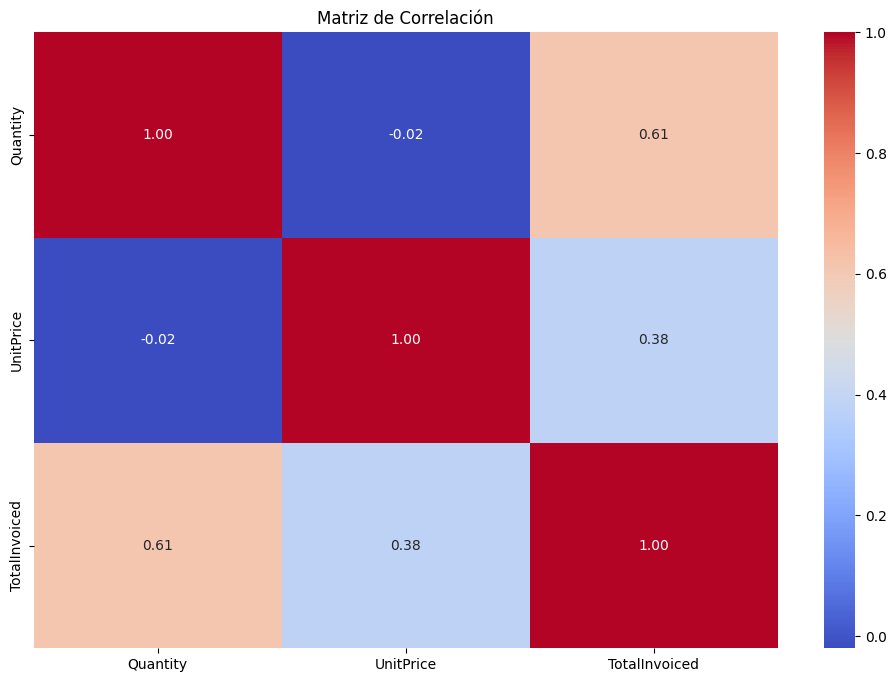

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


**Interpretación de la Correlación**
***Valores de Correlación:***
* Un valor cercano a 1 indica una correlación positiva fuerte.
* Un valor cercano a -1 indica una correlación negativa fuerte.
* Un valor cercano a 0 indica poca o ninguna correlación.

Como se interpretaba desde un principio la mejor correlación es entre:
Quantity y TotalInvoiced (0.61): Hay una correlación positiva moderada. Lo que me indica que a medida que la cantidad comprada (Quantity) aumenta, también tiende a aumentar el total facturado (TotalInvoiced). Y es lo que se esperaba, porque el total facturado es directamente afectado por la cantidad de productos comprados. Además al observar UnitPrice y TotalInvoiced (0.38): Existe una correlación positiva más baja, lo que sugiere que el precio unitario (UnitPrice) también contribuye al total facturado, pero no de manera tan fuerte como la cantidad. Este resultado es comprensible, ya que aunque el precio unitario es importante, la cantidad de productos juega un papel mayor en el total.
Quantity y UnitPrice (-0.02): Prácticamente no hay correlación entre la cantidad y el precio unitario. Esto indica que, en tu conjunto de datos, no hay una relación clara entre el número de productos comprados y el precio de los mismos, y si lo pensamos de acuerdo a que es un comercio o empresa minorista los datos de mi data frame es normal que la cantidad comprada no afecte al precio unitario como si se esperaria en un comercio mayorista. Es decir, comprar más o menos unidades no está asociado con cambios en el precio unitario.

In [ ]:
#renombrar df5 a df6 para iniciar el modelado (para mantener un check point ante cualquier reversión que necesite)
df6 = df5.copy()

**Paso 1: Definir el Problema de Predicción**
Predecir el TotalInvoiced (total facturado) a partir de otras variables como Quantity y UnitPrice.
* Variable objetivo (y): TotalInvoiced
* Variables predictoras (X): Quantity y UnitPrice

**Paso 2: Preparar los Datos Seleccionar las características (features):**
* Columnas relevantes del dataset: Quantity, UnitPrice, TotalInvoiced.
* Dividir los datos en entrenamiento (Train) y prueba (Test): Esto ayuda a evaluar la precisión del modelo. El 80% de datos para entrenamiento y 20% para prueba.

**Paso 3: Entrenar el Modelo de Regresión Lineal**

* Importar librerías necesarias:




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


* Preparar los datos (features y target):




In [ ]:
X = df6[['Quantity', 'UnitPrice']]  # Variables predictoras
y = df6['TotalInvoiced']            # Variable objetivo

# Dividir en datos de entrenamiento y prueba (el 0.2 es por lo edl 80% y el 20% en como se dividen los datos de df6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* Entrenar el modelo de regresión lineal:
 Ahora que tenemos ambas variables, vamos a crear un objeto de regresión lineal, usando la librería que hemos importado, al modelo voy a usar las siglas *"reg" por Regresión Lineal.*

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Obtener los coeficientes y el intercepto
m = reg.coef_  # Coeficiente de la pendiente
b = reg.intercept_  # Intercepto

# Imprimir la ecuación de la recta
print(f"La ecuación de la recta es: y = {m[0]}X + {b}")

La ecuación de la recta es: y = 1.0985979327612354X + 4.366221021365369


Esta salida de la celda, básicamente significa que ya se ha realizado el entrenamiento. Nuestro modelo ha visto las relaciones entre los datos que disponemos y ya está preparado para decirnos cuál es la mejor predicción posible para el precio de una nueva propiedad según su superficie.


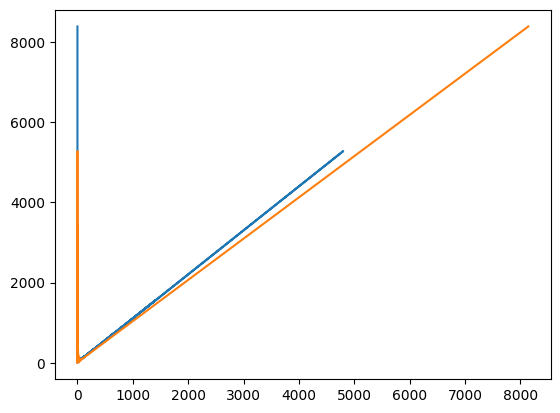

In [ ]:
plt.plot(df6[['Quantity', 'UnitPrice']],
        reg.predict(X));

**Paso 4: Evaluar modelo en base a datos de prueba**

Con el modelo esté entrenado, se debe evalúar su precisión con los datos de prueba.
- métricas a usar son el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²), que indican la calidad de las predicciones.

***Realizar predicciones:***

In [ ]:
y_pred = reg.predict(X_test) #estos son los valores de prediccion de acuerdo a los valores de prueba, serian los "ypred" que se deben comparar con los reales "ytest"


***Calcular métricas de evaluación:***

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = reg.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2363.461392778302
R² Score: 0.5470050438702934


**Paso 5: Interpretar los Resultados**

Con un MSE de 2363.46 sugiere que, en promedio, la diferencia cuadrada entre las predicciones del modelo y los valores reales es significativa.** Esto indica que el modelo de regresión lineal tiene un margen de error relativamente alto en sus predicciones. **

Un R² de 0.547 significa que el 54.7% de la variabilidad en los valores de TotalInvoiced es explicada por las variables Quantity y UnitPrice. Esto indica que el modelo captura algo de la relación entre estas variables, pero aún hay un 45.3% de variabilidad en TotalInvoiced que no está siendo explicada, (A REVISAR) en este caso el error deberia ser casi 0 porque es totalmente correlativo la cantidad y precio unitario para calcular el total facturado.

Por otro lado tambien puede significar que el Modelo elegido no era el correcto para este proyecto o data set.

y el MSE también sugiere que las predicciones del modelo tienen un error considerable, lo que también indica que el modelo no es suficientemente preciso.



---



---



#####**Clusterización**

Para el proyecto voy a intentar hacer un agrupamiento de clientes de acuerdo a la facturación en temporadas, fechas o por pais que es lo que más se compra y si apareciera otro cliente poder atenderlo de acuerdo a la experiencia.

Uno de las razones principales para elegir el modelo no supervizado es el descubrimiento de patrones ocultos:
El clustering no necesita etiquetas o categorías previas. Esto es útil porque permite descubrir agrupaciones naturales o patrones ocultos en los datos sin asumir de antemano cómo deberían estar estructurados (Como por ejemplo la agrupación clara, por país). En este caso en particular, podría ver:

* Diferentes tipos de clientes (según comportamiento de compra, gasto total, etc.).
* Agrupaciones por tipo de productos o patrones de compra a lo largo del tiempo.
* Comportamientos específicos según país o región.

Otro punto a considerar al usar clustering, se puede reducir la complejidad de los datos al agrupar elementos similares. Esto puede hacer que sea más fácil comprender grandes volúmenes de datos, y poder generar insights más simples de interpretar, como:

* Identificar Grandes clientes, de alto valor, que compran en grandes cantidades.
* Detectar posibles oportunidades o mercados  subatendidos (por ejemplo, clientes de ciertos países que compran poco pero que podrían ser potenciales mercados de crecimiento).

La clusterización en una base de datos de Clientes puede servir para: Personalización y recomendación
Una vez que tienes agrupados a tus clientes o productos en clusters, puedes utilizar esta información para personalizar la experiencia del cliente. Por ejemplo:

Recomendaciones de productos basadas en el cluster al que pertenece un cliente.
Ofertas o descuentos dirigidos específicamente a grupos con comportamientos de compra similares.

Además en este caso, con mi data set, para un comercio minorista que vende a varios clientes de diferrentes paises ayudaria en la optimización de recursos. Si se logra segmentar a los clientes o transacciones de forma efectiva, se puede optimizar el uso de recursos como:

Inventarios: Podría prever la demanda de ciertos productos basándote en los comportamientos del cluster.
Logística: Optimizar envíos al identificar patrones de compra regionales o temporales, si es que aun no se hace o es ineficiente, o se pueda mejorar.

La justificación técnica de este proceso se basa en minimizar la varianza dentro de cada cluster y maximizar la distancia entre clusters, logrando una organización eficiente de los datos. Esta técnica es ampliamente utilizada en problemas de negocio, marketing y análisis de clientes.

Importación de librerias

In [ ]:
#Importing the Libraries
# Manipulación de datos
import numpy as np
import pandas as pd
import datetime
#Graficas
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
# preprocesar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Para reduccion de dimensionalidad
from sklearn.decomposition import PCA
#Cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
# metricas
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn import metrics
#warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
# renombrar df6 a df7
df7 = df6.copy()

In [ ]:
df7.info()


<class 'pandas.core.frame.DataFrame'>
Index: 524873 entries, 11 to 539391
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524873 non-null  object        
 1   StockCode      524873 non-null  object        
 2   Description    524873 non-null  object        
 3   Quantity       524873 non-null  int64         
 4   InvoiceDate    524873 non-null  datetime64[ns]
 5   UnitPrice      524873 non-null  float64       
 6   CustomerID     524873 non-null  object        
 7   Country        524873 non-null  object        
 8   TotalInvoiced  524873 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.0+ MB


**Paso 1: Preparar el Dataset**
Para realizar la operacion de clustering es necesario preprocesar los datos
Los pasos a realizar son:
* Codificar los datos categoricos
* Escalar los datos usando StandardScales de sklearn
* Hacer PCA para reducir la dimensionalidad del dataframe

* ***Codificar los datos categoricos***

In [ ]:
# Lista de datos categoricos
cat= df7.select_dtypes(include='object').columns.tolist()
print('Los datos categoricos del dataset son: ', cat)

Los datos categoricos del dataset son:  ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']


**Paso 2: Codificar las Variables Categóricas**

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in cat:
    # Convert the column to string type before applying LabelEncoder
    df7[i] = df7[i].astype(str)
    #Convertir a cadena: antes de aplicar LabelEncoder, el código convierte explícitamente la columna df6[i]al tipo de cadena mediante astype(str). Esto garantiza que todos los valores de la columna se traten como cadenas, lo que resuelve el error causado por tipos de datos mixtos.
    df7[i] = df7[[i]].apply(LE.fit_transform)
print('Ahora todas las variables son númericas')

Ahora todas las variables son númericas


In [ ]:
df7.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalInvoiced
11,6514,3912,2690,1,2011-05-03 13:46:00,8142.75,2701,36,8142.75
34,11588,3909,1066,1,2011-08-11 10:14:00,4505.17,4337,36,4505.17
36,10450,3910,2191,1,2011-07-18 12:30:00,4287.63,4337,36,4287.63
38,16071,3910,2191,1,2011-10-27 14:20:00,4161.06,151,13,4161.06
40,16069,3910,2191,1,2011-10-27 14:13:00,4161.06,151,13,4161.06


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524873 entries, 11 to 539391
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524873 non-null  int64         
 1   StockCode      524873 non-null  int64         
 2   Description    524873 non-null  int64         
 3   Quantity       524873 non-null  int64         
 4   InvoiceDate    524873 non-null  datetime64[ns]
 5   UnitPrice      524873 non-null  float64       
 6   CustomerID     524873 non-null  int64         
 7   Country        524873 non-null  int64         
 8   TotalInvoiced  524873 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 40.0 MB


In [ ]:
numeric_df7 = df7.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlation_matrix = numeric_df.corr()

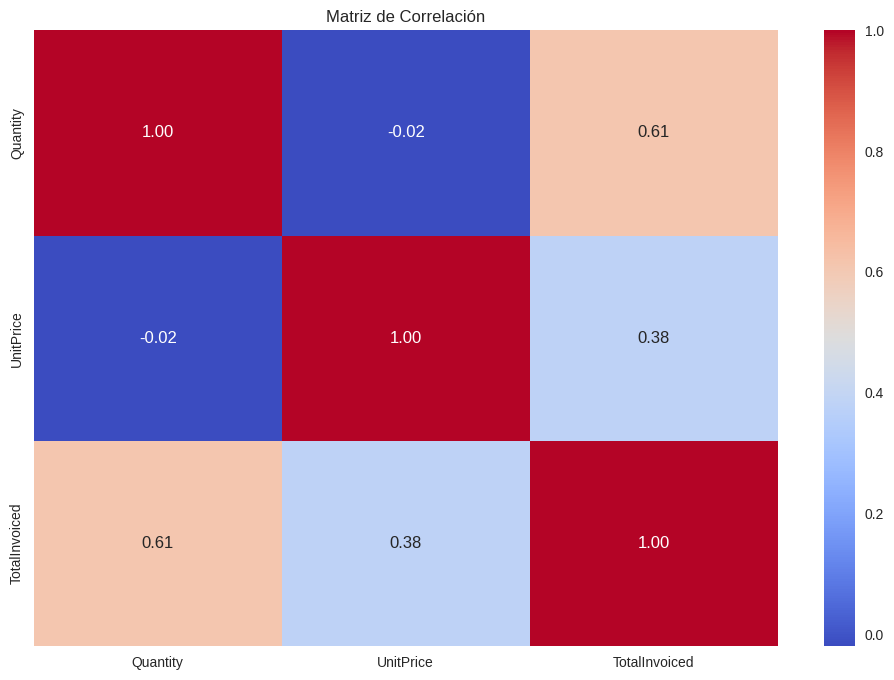

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

######**K-Means**

**a.Seleccionar las 9 Columnas para la Clusterización**


In [ ]:
# Columnas de mi data set para la clusterización
X=df7[['Quantity', 'UnitPrice', 'TotalInvoiced', 'Country', 'StockCode', 'CustomerID', 'InvoiceNo']]  # Agregar todas las columnas relevantes


Nota: como me mostraba un error en la Normalización de datos, al usar la columna de Fecha, se decide desestimarla para evitar dicho error.

**b.Normalizar los Datos / Estandarización**

Para asegurar que todas las variables tengan el mismo peso en el proceso de clusterización, se debe estandarizar los datos:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**c. Algoritmo K-Means Clustering**

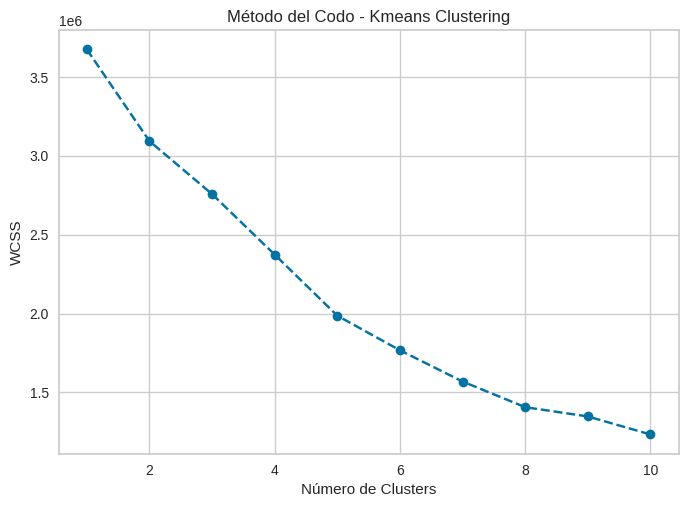

In [ ]:
#Ya con todas las columnas escaladas, se puede aplicar K-Means.
#Primero puedes hacer el método del codo para determinar el número óptimo de clusters.
# Método del codo para encontrar el número óptimo de clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

# Graficar el codo para determinar número de clusters
plt.plot(range(1, 11), wcss, marker = 'o', linestyle ='--')
plt.title('Método del Codo - Kmeans Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


Se acuerdo a la Grafica mostrada por el metodo del codo, parece que el "codo" ocurre alrededor de*** 4 o 5 clusters***, ya que después de ese punto, la reducción en WCSS es más suave. Esto significa que agregar más clusters después de ese punto no aporta una mejora significativa en la compactación de los clusters.

**d.Elegir el Número de Clusters y Aplicar K-Means**

In [ ]:
# Crear el modelo KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

Ajusto mi modelo al conjunto de datos

In [ ]:
kmeans.fit(X_std)

KMeans(n_clusters=4, random_state=42)

In [ ]:

# Agregar los clusters al dataset
df7_kmeans = df7.copy()
df7_kmeans['Cluster Kmeans'] = kmeans.labels_

# Ver los primeros registro3s con los clusters asignados

df7_kmeans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalInvoiced,Cluster Kmeans
11,6514,3912,2690,1,2011-05-03 13:46:00,8142.75,2701,36,8142.75,2
34,11588,3909,1066,1,2011-08-11 10:14:00,4505.17,4337,36,4505.17,2
36,10450,3910,2191,1,2011-07-18 12:30:00,4287.63,4337,36,4287.63,2
38,16071,3910,2191,1,2011-10-27 14:20:00,4161.06,151,13,4161.06,2
40,16069,3910,2191,1,2011-10-27 14:13:00,4161.06,151,13,4161.06,2


Caracteristicas de los grupos

In [ ]:
df7_kmeans_analysis = df7_kmeans.groupby(['Cluster Kmeans']).mean()
df7_kmeans_analysis


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalInvoiced
Cluster Kmeans,,,,,,,,,
0,10343.791901,1576.586673,2126.589517,36.466239,2011-07-07 16:06:50.234815232,3.856723,814.659622,13.266437,62.065566
1,15164.529599,1760.934925,2095.577041,8.722428,2011-10-07 20:17:14.592823296,3.502523,2697.429587,35.904978,16.648230
2,13295.408163,3909.530612,1627.204082,1.000000,2011-08-29 09:58:25.714285568,2086.252653,3034.224490,30.673469,2086.252653
3,4926.501998,1431.395297,2054.747481,7.756784,2011-03-21 16:24:05.943226624,3.845688,3029.578597,35.931251,15.581354


**Evaluar la clusterización**

El coeficiente de Silhouette es una métrica que te permite evaluar la calidad de la clusterización. Este coeficiente varía entre -1 y 1, donde:

1 indica que los puntos están bien agrupados y están lejos de otros clusters.
0 indica que los puntos están en los límites entre dos clusters.
-1 sugiere que los puntos podrían estar mal agrupados.

In [ ]:
#  usar una métrica para Evaluar la Clusterizacion

# Calcular coeficiente de Silhouette score para evaluar la calidad de la clusterización
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_std, kmeans.labels_)
print(f'El coeficiente de Silhouette para {4} clusters es: {silhouette_avg:.3f}')


El coeficiente de Silhouette para 4 clusters es: 0.248


**Visualizar el Silhouette para Cada Cluster**
Además de calcular el promedio, puedes visualizar los coeficientes de Silhouette para cada punto en el clustering:

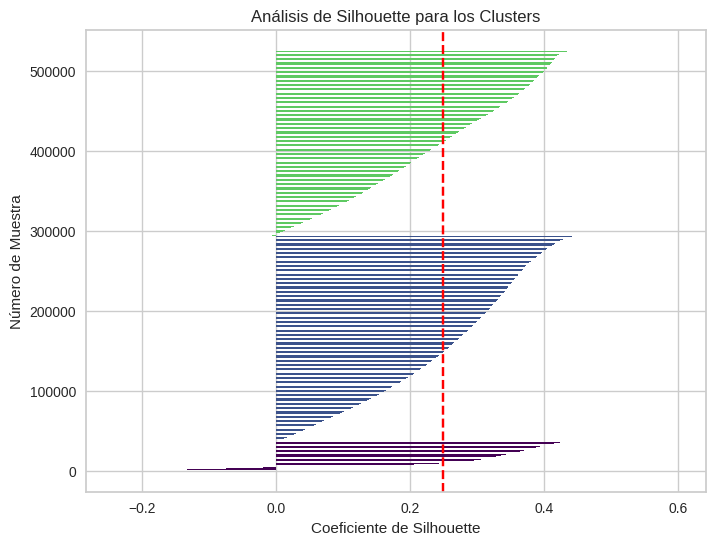

In [ ]:
from sklearn.metrics import silhouette_samples

# Calcular los coeficientes de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(X_std, kmeans.labels_)

# Crear un DataFrame para visualizar
import matplotlib as mpl

n_clusters = 4
fig, ax = plt.subplots(figsize=(8, 6))

# El ancho de cada barra
y_lower = 10
for i in range(n_clusters):
    # Agregar todos los valores de Silhouette para el cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / n_clusters)

    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=0.5, color=color)
    y_lower = y_upper + 10  # Espacio entre clusters

ax.set_title('Análisis de Silhouette para los Clusters')
ax.set_xlabel('Coeficiente de Silhouette')
ax.set_ylabel('Número de Muestra')
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.show()


Un Silhouette Score cercano a 1 indica que los clusters están bien definidos, mientras que un valor cercano a 0 indica que los clusters no están claramente separados.

**f. Interpretar los Resultados**
Puedes analizar las características de cada cluster viendo la media o distribución de las variables dentro de cada uno (TODAVIA NO TERMINADO DADO QUE NO EJECUTA EL CODIGO PARA EL COEFICIENMTE DE Silhouette, tampoco arrija error, solo queda cargando por varios minutos hasta que lo detengo, ejemplo mientras escribo esto pasaron 7 minutos 37 segundos---)

Justificación del Uso del Índice de Silhouette
Interpretación Clara: El índice de Silhouette proporciona una interpretación clara de cómo se comportan los puntos dentro de los clusters.
Comparación: Permite comparar diferentes números de clusters y evaluar si el aumento en la cantidad de clusters mejora la separación entre ellos.
No Requiere Etiquetas: Es útil en el clustering no supervisado, ya que no requiere etiquetas reales para su cálculo.



---



---



---



######►Kmeans - RFM

***El análisis KMeans RFM*** es un acrónimo de Recency, Frequency y Monetary:

Recency (R): Hace referencia al tiempo transcurrido desde la última compra o interacción de un cliente. Clientes más recientes tienen un valor más alto.
Frequency (F): Se refiere a la cantidad de veces que un cliente ha realizado una compra o interacción dentro de un período determinado.
Monetary (M): Representa el valor monetario de las compras totales realizadas por el cliente en el período de análisis.
El método KMeans RFM utiliza estos tres factores para agrupar (clusterizar) a los clientes en segmentos basados en sus comportamientos de compra o interacciones. Este enfoque es útil para segmentar a los clientes en categorías como "clientes leales", "clientes esporádicos", "clientes de alto valor", entre otros.

Cómo funciona KMeans RFM:
Recency (R): Evalúa qué tan recientemente un cliente ha comprado.
Frequency (F): Calcula cuántas veces ha comprado un cliente.
Monetary (M): Analiza el valor total de las compras de un cliente.
Cada cliente se clasifica según estos tres criterios, y luego el algoritmo KMeans agrupa a los clientes en diferentes clusters.

¿Se puede aplicar KMeans RFM a mi base de datos: "Online Retail"?
Sí, porque tengo información sobre transacciones de compras de un año completo (fechas de compra, número de compras por cliente y el valor monetario de las transacciones), estas variables que necesito son:

* InvoiceDate (Fecha de la transacción): Para ver que cliente es el que tuvo la transaccion mas reciente a partir de la fecha de la última transacción de cada cliente.
* Quantity: Puede utilizarse para la frecuencia (cantidad de productos comprados).
* TotalInvoiced: Representa el valor monetario de las compras por cada transacción.

**Engineering Feature**

In [ ]:
# renombrar df6 a df8 para siguiente modelado de datos con Kmeans - modelo RFM
df8 = df4.copy()

In [ ]:
# Fecha mas reciente de ultima compra
max(df8['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [ ]:
import datetime as dt

max(df8['InvoiceDate'])+dt.timedelta(days=1)

Timestamp('2011-12-10 12:50:00')

In [ ]:
end_date = max(df8['InvoiceDate'])+dt.timedelta(days=1)

Agregue una fecha con un dia más a la fecha maxima de la base de datos, para tenerla de referencia y luego para el modelado poder usarlo para los calculos.

**AGREGAR TABLA - CREACION DE CARACTERISTICAS RFM**

In [ ]:
# Agrupamiento por CustomerID, no se tienen en cuenta los valores Nan
df_rfm=df8.groupby('CustomerID').agg(
    recency = ('InvoiceDate', lambda x: (end_date - x.max()).days), #para calculo de las fechas mas recientes
    frequency = ('InvoiceNo','count'),     #contabilizar la cantidad de  transacciones registradas
    monetary = ('TotalInvoiced','sum')   # suma monetaria, para ver el valor del cliente respecto a una variable monetaria
)

df_rfm.head()

,recency,frequency,monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04


Nota de Recordatorio: Luego de la Limpieza de datos teniamos un data set con 132184 datos NaN en ClientID, y tambien teniamos un total de 19955 transacciones diferentes en nuestra base de mas de 500000 registros y a su vez 4337 ClientID diferentes.

In [ ]:
df_rfm.isna().sum(axis=0) #para verificar que no hay nulos

,0
recency,0
frequency,0
monetary,0


**EXPLORACION DE DATOS**

In [ ]:
df_rfm.monetary.mean() #promedio monetario

1983.5337076320036

In [ ]:
df_rfm.shape #tamaño del data set rfm, esto es la cantidad de clientes o ClientID

(4337, 3)

Coincide con el numero de ClientID antes calculado en el Proyecto, 4337 clientes.

* Visualizaciones rápidas de mi data set rfm

recency:


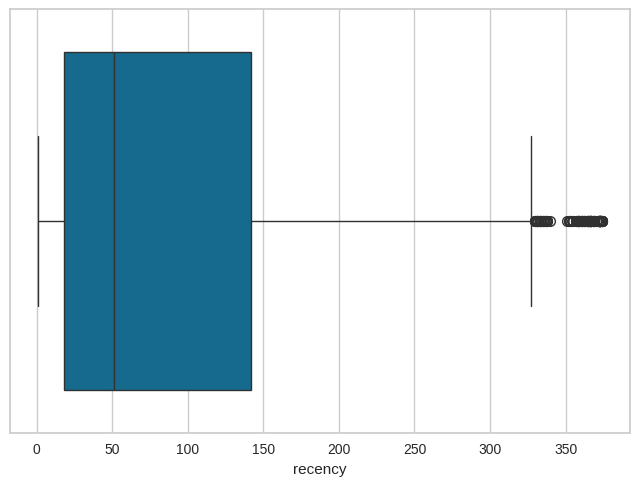

frequency:


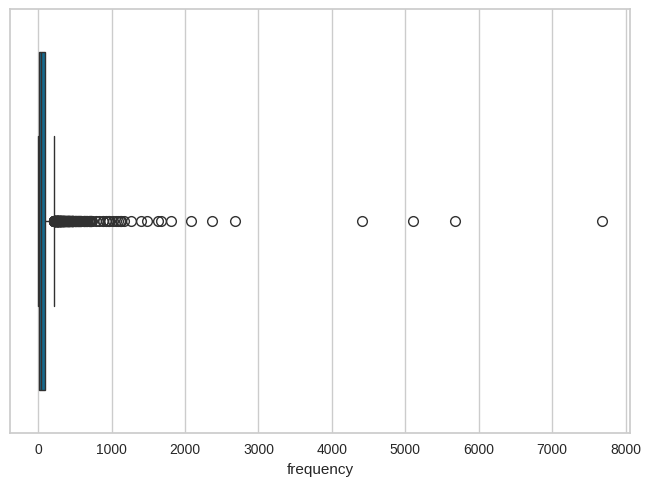

monetary:


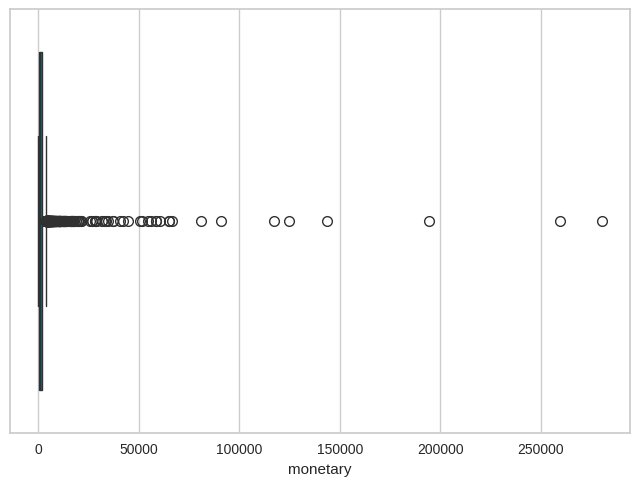

In [ ]:
for i in df_rfm.columns:
  print(str(i)+':')
  ax = sns.boxplot(x=df_rfm[str(i)])
  plt.show()

En los diferentes Boxplot se ve una disparidad de clientes.

* Recency tiene un grupo de clientes que realizaron una transacción entre los 20 y 150 ultimos dias. Por por otro lado tambien hay clietnes que hace mucho tiempo no realizan una transaccion, siendo casi un año desde su ultima compra.
* frequency: Hay clientes, los valores outliers o atipicos que se ven en la grafica que son los que tienen la mayor frecuencia de compra, y tienen registradas la mayor cantidad de transacciones, y son estos clientes los que se podrian considerar como clientes importantes por el volumen de compra. La mayoria de Clientes no tiene mucho más de 1000 transacciones registradas.
* Monetary: Si bien hay clientes que realizaron grandes compran con un gran valor monetario, la mayoria de clientes realizan compras de menos de 25000 unidades monetarias (libras esterlinas de acuerdo a la informacion del data set).



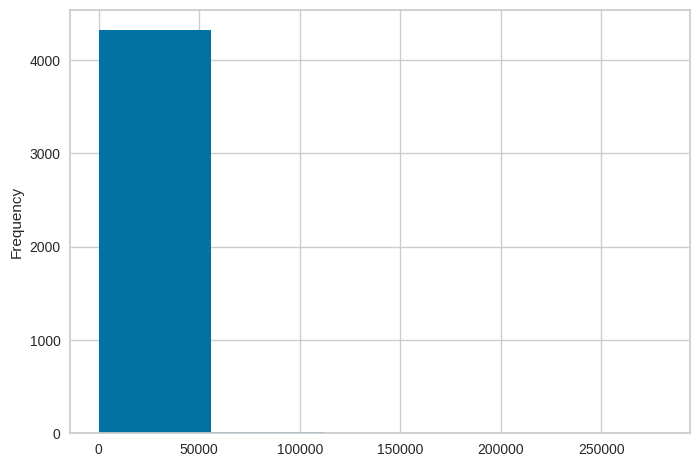

In [ ]:
df_rfm.monetary.plot.hist(bins=5)
plt.show()

Se puede visualizar la totalidad de los clientes de 0 a 50000 el valor monetario de las transacciones.

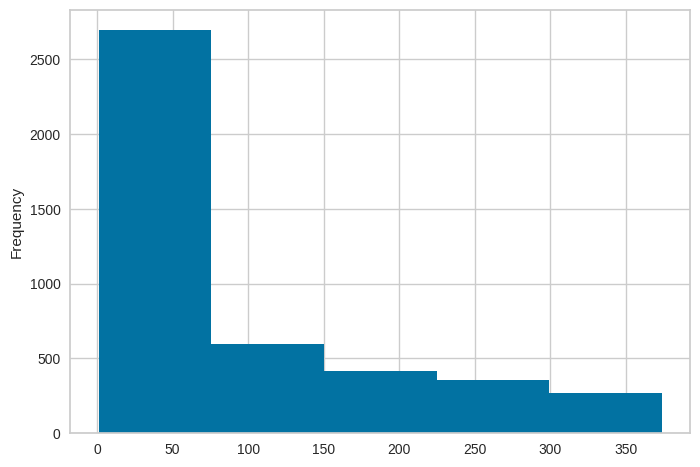

In [ ]:
df_rfm.recency.plot.hist(bins=5)
plt.show()

de 0 a 150 es la recencia que se puede ver de la mayoría de los clientes

RELACIÓN ENTRE VARIABLES RFM

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


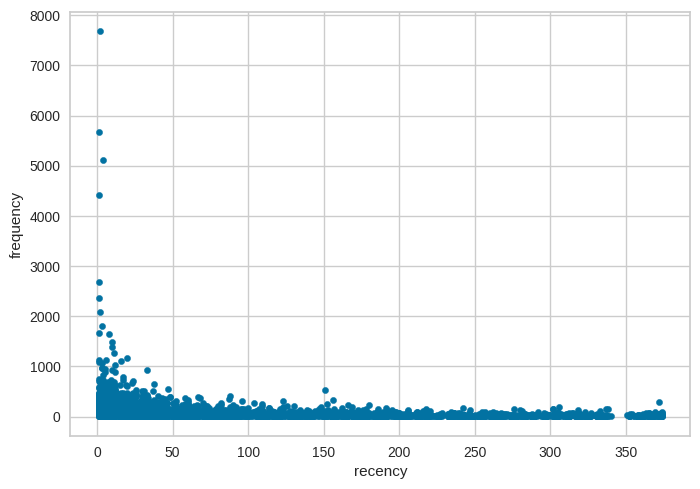

In [ ]:
df_rfm.plot("recency","frequency",kind="scatter")
plt.show()

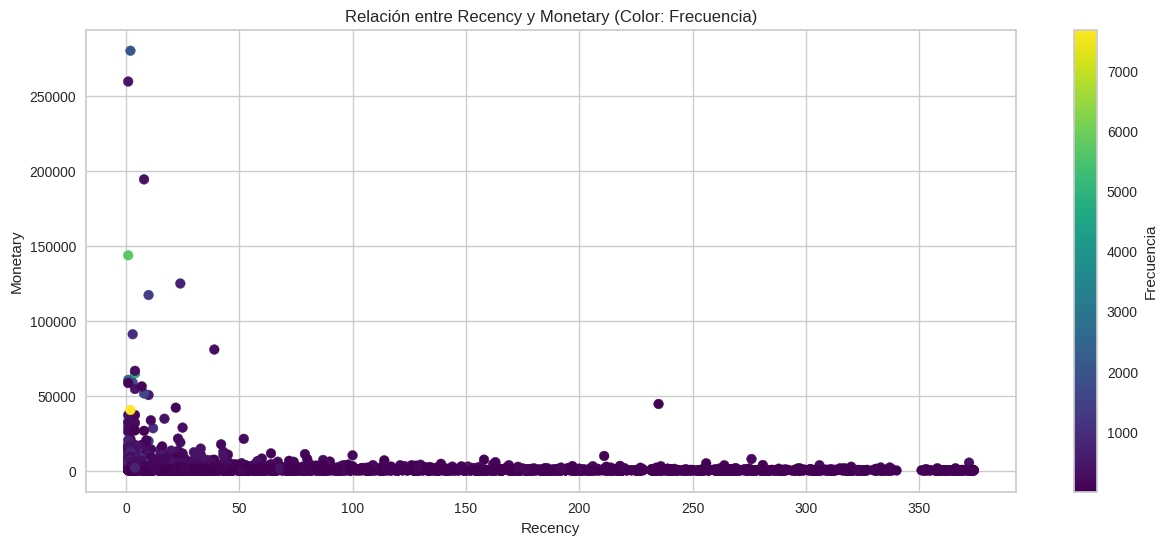

In [ ]:
# Visualizar la relación entre Recency y Monetary con colores que representan la Frecuencia
plt.figure(figsize=(15, 6))
scatter = plt.scatter(df_rfm['recency'], df_rfm['monetary'], c=df_rfm['frequency'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Relación entre Recency y Monetary (Color: Frecuencia)')
plt.colorbar(scatter, label='Frecuencia')
plt.show()

Los clientes en los que se debería hacer foco son aquellos los que compraron más recientemente y tienen dolores de compra más grandes, para los cuales podemos impulsar acciones de mejora de satisfaccion del cliente o bien adelantarse a futuras compras, entre otras.

Ahora vamos a dar inicio a la estandarización para el cálculo de la distancia entre cada uno de los puntos que al final es con lo que yo voy a agrupar los valores o el valor que tiene cada cliente para la empresa.

**Preparación de datos**

**FEATURE SCALING**: normalización y estandarización

In [ ]:
df_rfm1 = df_rfm.copy()

In [ ]:
#PREPROCESAMIENTO DE DATOS

#voy a definir el logaritmo de mis datos (tranformarlos) para poder usar un mejor cálculo de las distancias
#la transformación logaritmica podra mejorar el rendimiento del algoritmo de agrupamiento Kmeans que se haya posteriormente.

df_log=np.log1p(df_rfm1)
df_log.head()


,recency,frequency,monetary
CustomerID,,,
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.995732,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324
12352.0,3.610918,4.454347,7.826858


In [ ]:
#llamo a la biblioteca
scaler = StandardScaler()

scaler.fit(df_log)

# hago la standarización
df_norm=scaler.transform(df_log) # como sale como un arreglo luego debo convertirlo a un dataframe


In [ ]:
#para hacer la estandarización se llama a las diferentes columnas y el índice porque quiero tener información del número de cliente
df_norm = pd.DataFrame(df_norm, columns = ["recency","frequency","monetary"], index=df_rfm1.index)
df_norm.head() #para tener una mejor lectura

,recency,frequency,monetary
CustomerID,,,
12347.0,-2.040458,1.188955,1.422401
12348.0,0.372874,-0.211996,0.725561
12349.0,-0.623933,0.461528,0.707774
12350.0,1.424978,-0.674251,-0.612741
12352.0,-0.164592,0.582267,0.990390


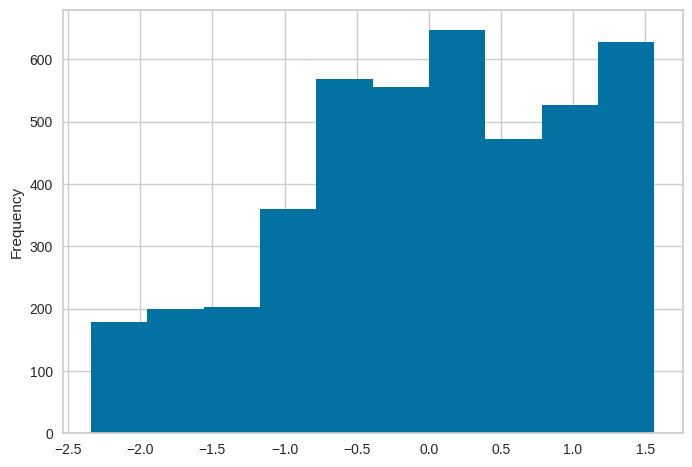

In [ ]:
df_norm.recency.plot(kind="hist")
plt.show()

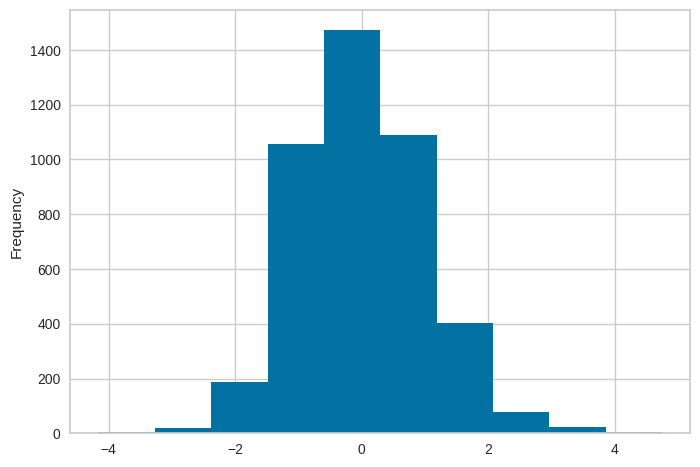

In [ ]:
df_norm.monetary.plot(kind="hist")
plt.show()

estos histogramas de recency y monetary me permiten ver el comportamiento de mis datos

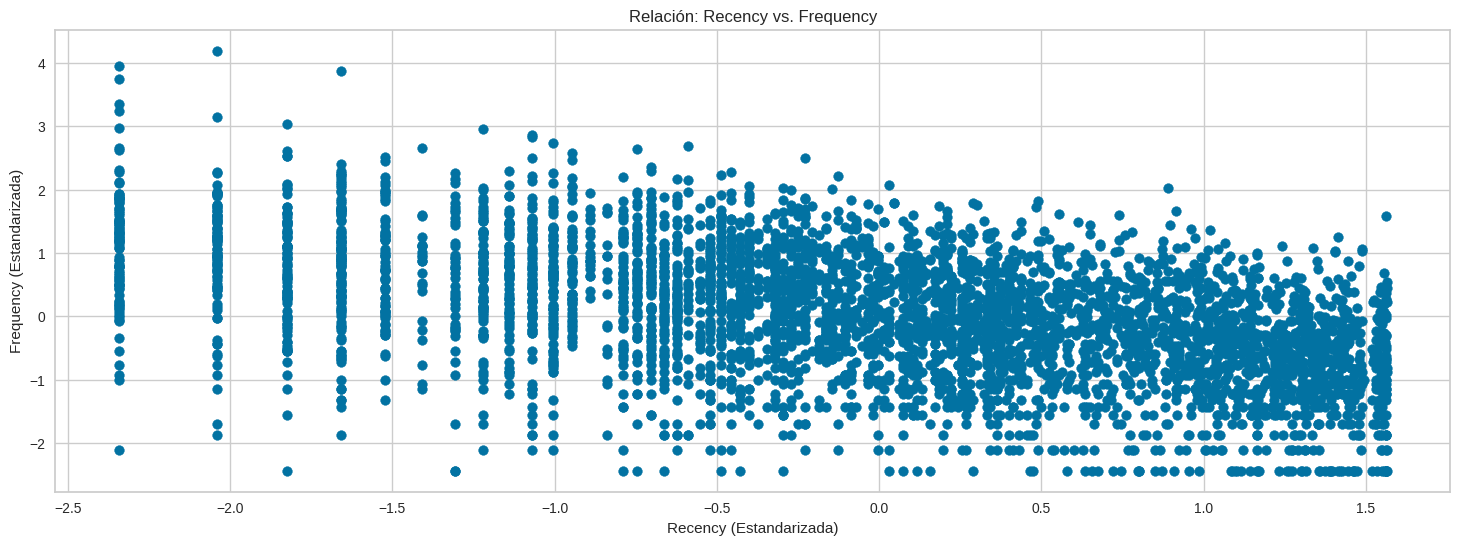

In [ ]:
# grafico de dispercion que muestre la relacion de recency y frecuency de mi dataset df_norm

plt.figure(figsize=(18, 6))
plt.scatter(df_norm['recency'], df_norm['frequency'])
plt.xlabel('Recency (Estandarizada)')
plt.ylabel('Frequency (Estandarizada)')
plt.title('Relación: Recency vs. Frequency')
plt.show()

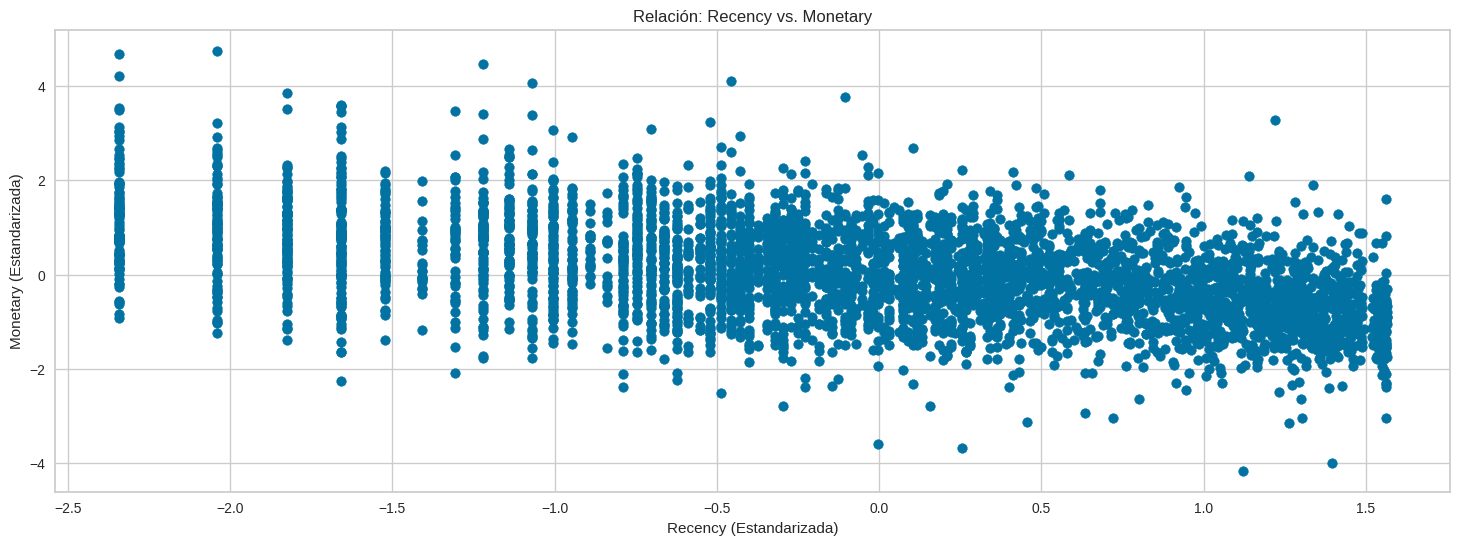

In [ ]:
#grafico de dispercion que muestre la relacion de recency y frecuency de mi dataset df_norm

plt.figure(figsize=(18, 6))
plt.scatter(df_norm['recency'], df_norm['monetary'])
plt.xlabel('Recency (Estandarizada)')
plt.ylabel('Monetary (Estandarizada)')
plt.title('Relación: Recency vs. Monetary')
plt.show()

Para este proyecto, y este modelado, voy a utilizar el mismo número de clusters que antes se habían elegido por el método del codo, 4 (cuatro).

**CLUSTERING**

In [ ]:
kmeans=KMeans(n_clusters=4, random_state=1, init='k-means++')

In [ ]:
#se ajustan los datos
kmeans.fit(df_norm)

KMeans(n_clusters=4, random_state=1)

In [ ]:
#recuperar cada etiqueta
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 909, 1360,  884, 1184]))

In [ ]:
print(dict(pd.Series(kmeans.labels_).value_counts()))

{1: 1360, 3: 1184, 0: 909, 2: 884}


* agregar clusters como etiqueta de datos

In [ ]:
df_norm['cluster']=kmeans.labels_
df_norm.head()

,recency,frequency,monetary,cluster
CustomerID,,,,
12347.0,-2.040458,1.188955,1.422401,2
12348.0,0.372874,-0.211996,0.725561,3
12349.0,-0.623933,0.461528,0.707774,2
12350.0,1.424978,-0.674251,-0.612741,1
12352.0,-0.164592,0.582267,0.990390,3


In [ ]:
df_norm["cluster"]=df_norm["cluster"].astype("category") #lo defino como valores categoricos, no numericos

In [ ]:
print(df_norm.columns)

Index(['recency', 'frequency', 'monetary', 'cluster'], dtype='object')


* Visualización de reclaciones Recency-Monetary y Frecuency-Monetary

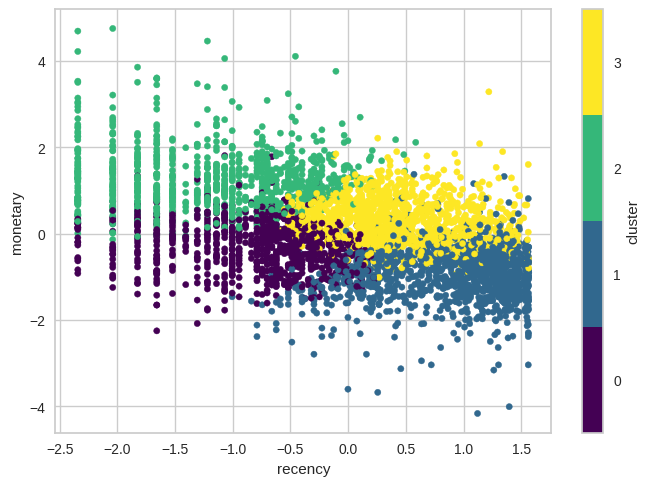

In [ ]:
df_norm.plot(x="recency",y="monetary",c="cluster",kind="scatter",colormap="viridis")
plt.show()

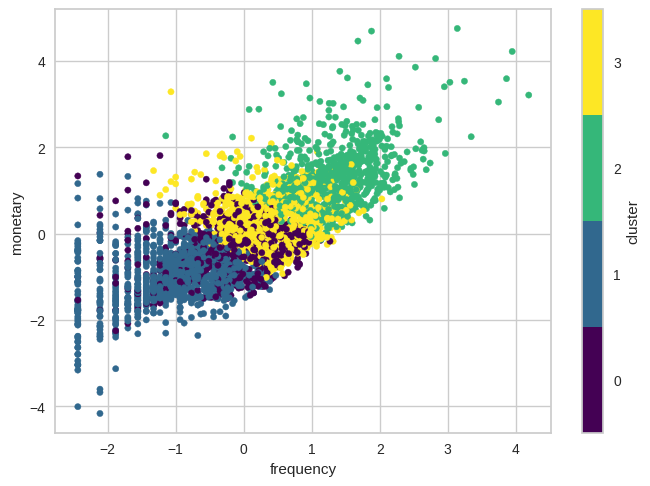

In [ ]:
df_norm.plot(x="frequency",y="monetary",c="cluster",kind="scatter",colormap="viridis")
plt.show()

* Ahora voy a hacer la comprobación con los datos de RFM antes de normalizar

In [ ]:
df_rfm1["cluster"]=kmeans.labels_
df_rfm1.head()

,recency,frequency,monetary,cluster
CustomerID,,,,
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,3
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1
12352.0,36,85,2506.04,3


In [ ]:
df_rfm1["cluster"]=df_rfm1["cluster"].astype("category")

In [ ]:
df_rfm1.groupby("cluster").agg(  #creacion de tabla, agregada.
    recency = ("recency","mean"),
    frequency = ("frequency","mean"),
    monetary = ("monetary","mean"),
    cluster_size=("monetary","count")
    ).round(1).sort_values(by="recency") #solo ver 1 valor decimal (1)

<ipython-input-198-59de449499c0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rfm1.groupby("cluster").agg(


,recency,frequency,monetary,cluster_size
cluster,,,,
2,13.8,276.8,6793.3,884
0,19.7,40.7,638.1,909
3,102.0,77.0,1369.4,1184
1,184.2,14.6,291.1,1360


**Observaciones:** Se puede decir a partir de la última tabla que el grupo de clientes del cluster 2 son los que tuvieron compras más recientemente tienen a su vez mayor frecuencia de compra o la mayor cantidad de transacciones registradas y a su vez el mayor valor monetario registrado este grupo se puede clasificar como grandes clientes o clientes VIP para la empresa. Como acción o posible oportunidad de mejora es apuntar a una campaña de marketing a estos clientes VIP para mejorar la relación con el cliente o lograr una satisfacción del cliente alta.

Cluster 0, este cluster o grupo de clientes también tiene transacciones recientes pero con una menor frecuencia y bajo valor monetario en las transacciones.

Cluster 3, ultima compra hace por lo menos 3 meses, con una frecuencia similar a la del cluster 0 pero con un valor monetario más alto que el cluster 0 y 1, a su vez representa casi el 25% de los clientes de mi base de datos.

Cluster 1, el grupo de clientes con transacciones más alejadas en el tiempo, de casi seis meses que no realizó una transacción, con una frecuencia muy baja y un valor monetario poco significativo, lo cual no es muy extraño dado que la empresa analizar es un comercio minorista Y estos pueden ser clientes que se encuentren en la zona y hagan o hayan hecho alguna compra de ocasión


* visualización de los datos de los clusters

<ipython-input-201-f215dbbfec0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='monetary', data=df_rfm1, palette="viridis_r")  # Use viridis_r for green to red colormap


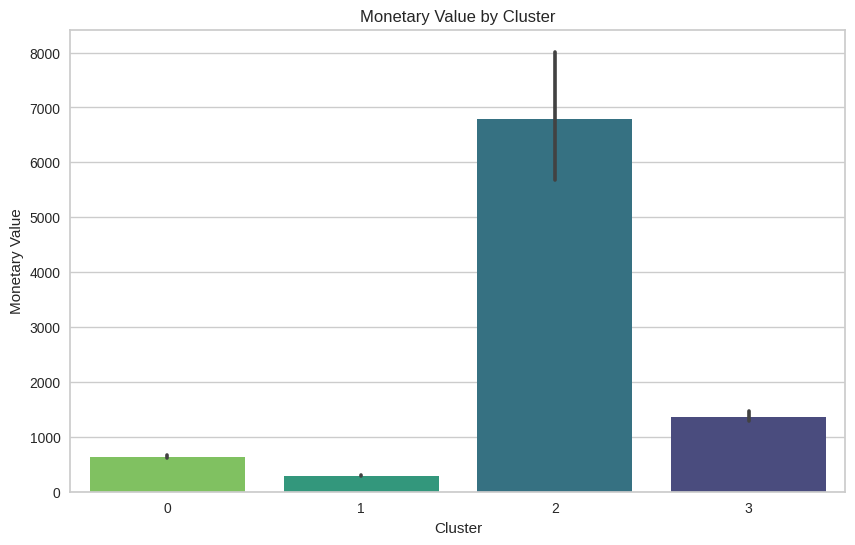

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of Monetary value by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='monetary', data=df_rfm1, palette="viridis_r")  # Use viridis_r for green to red colormap

plt.title('Monetary Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

plt.show()

<ipython-input-202-25a1b7d47695>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='recency', data=df_rfm1, palette="viridis_r")


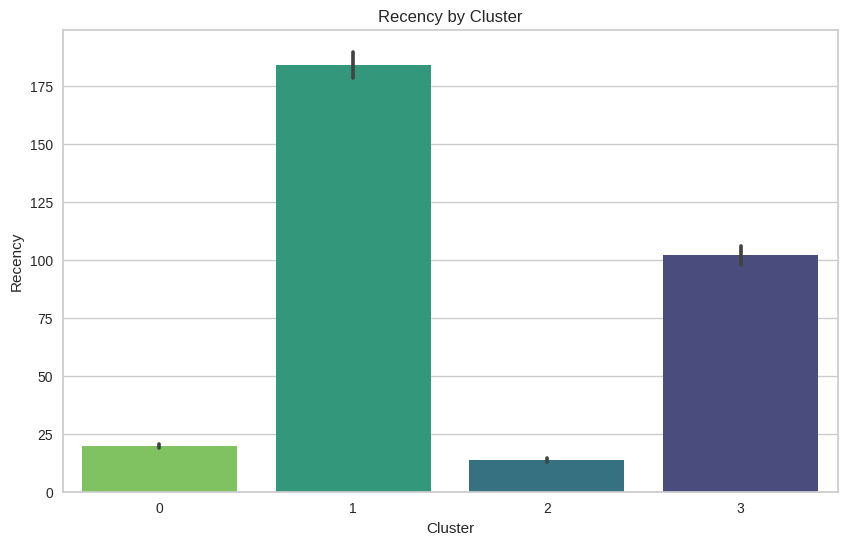

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='recency', data=df_rfm1, palette="viridis_r")

plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

plt.show()

<ipython-input-205-4f03ec0f59e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='frequency', data=df_rfm1, palette="viridis_r")


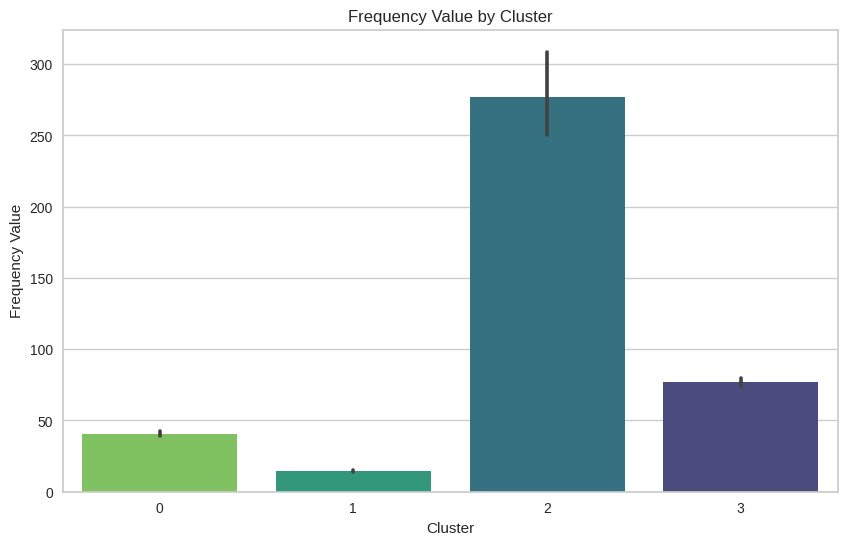

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='frequency', data=df_rfm1, palette="viridis_r")

plt.title('Frequency Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency Value')

plt.show()


Entender: la variación de cada cliente en frecuencia valor monetario por transacción y la recencia es importante para poder tener una base y entendimiento del comportamiento de cada cliente para poder enfocar cómo será la gestión con cada cliente de acuerdo a sus comportamientos y hacer foco de acuerdo a cada uno de estos.

► Interpretación de los Clusters:

1. **Cluster 2** (mayor frecuencia y valor monetario):
   - **Recency promedio**: 13.8 (clientes recientes).
   - **Frequency promedio**: 276.8 (clientes que compran frecuentemente).
   - **Monetary promedio**: 6793.3 (clientes que gastan mucho).
   - **Cluster size**: 884 clientes.
   - **Interpretación**: Este es el grupo de **GRANDES/VIP**: frecuentes, recientes y con alto valor.

2. **Cluster 0** (baja frecuencia y valor monetario, pero recientes):
   - **Recency promedio**: 19.7.
   - **Frequency promedio**: 40.7.
   - **Monetary promedio**: 638.1.
   - **Cluster size**: 909 clientes.
   - **Interpretación**: Clientes ** RECIENTES/NUEVOS**, pero con baja frecuencia y valor monetario. Podrían ser clientes nuevos y necesitar estrategias para aumentar la frecuencia de compras.

3. **Cluster 3** (mediana frecuencia y valor monetario):
   - **Recency promedio**: 102.0.
   - **Frequency promedio**: 77.0.
   - **Monetary promedio**: 1369.4.
   - **Cluster size**: 1184 clientes.
   - **Interpretación**: Clientes **promedio** en cuanto a compras y frecuencia, pero que no han comprado recientemente. Podrías enfocarte en campañas de reactivación.

4. **Cluster 1** (menor frecuencia y valor monetario):
   - **Recency promedio**: 184.2.
   - **Frequency promedio**: 14.6.
   - **Monetary promedio**: 291.1.
   - **Cluster size**: 1360 clientes.
   - **Interpretación**: **Clientes menos activos**. Compran con baja frecuencia, gastan poco y no han comprado recientemente. Pueden llegar a necesitar incentivos o reactivación más fuerte.

► Siguiente paso:

 **Estrategias de Marketing enfocada a cada grupo de clientes** (estrategias específicas):
   - Cluster 2: **Fidelización** y mantenimiento de estos clientes.
   - Cluster 0: **Incentivos** para aumentar la frecuencia de compra.
   - Cluster 3: **Reactivación** con campañas de remarketing.
   - Cluster 1: **Incentivos fuertes** para reengancharlos.

* Visualización de los resultados de la clusterización KMeans

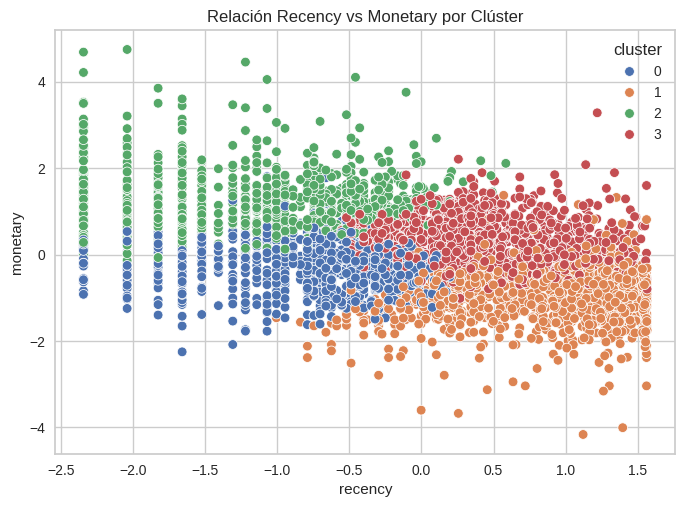

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar relación entre recency y monetary
sns.scatterplot(x='recency', y='monetary', hue='cluster', data=df_norm, palette='deep')
plt.title('Relación Recency vs Monetary por Clúster')
plt.show()


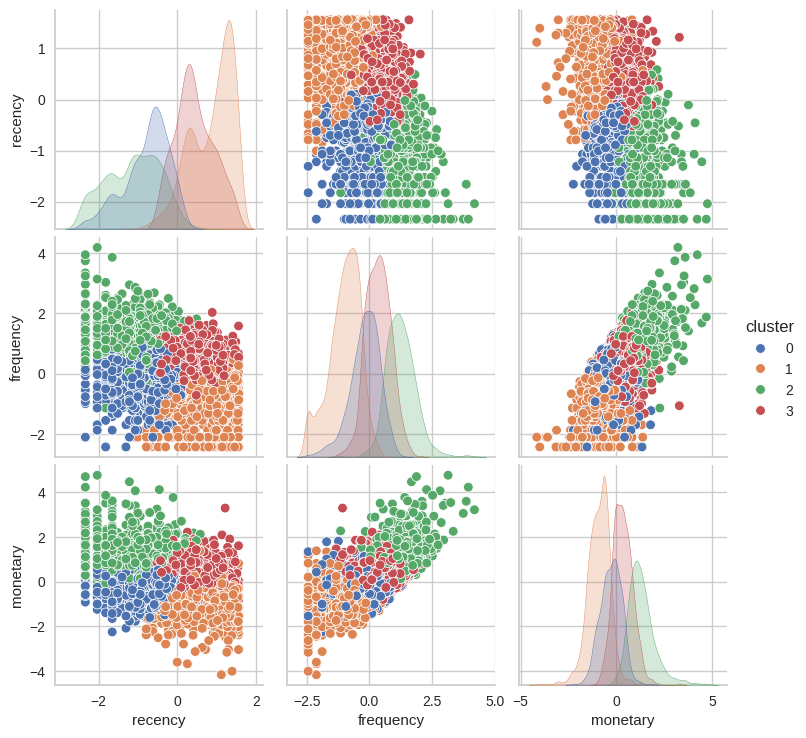

In [ ]:
sns.pairplot(df_norm, hue='cluster', vars=['recency', 'frequency', 'monetary'], palette='deep')
plt.show()

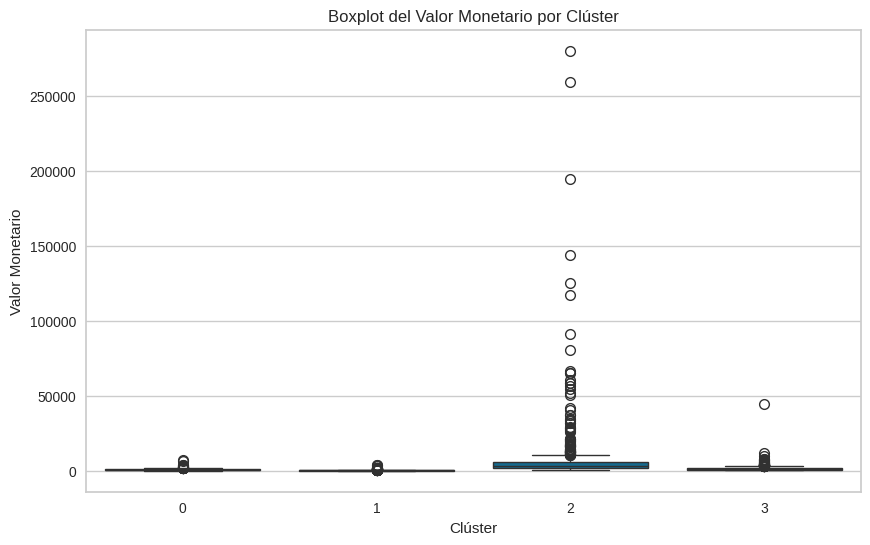

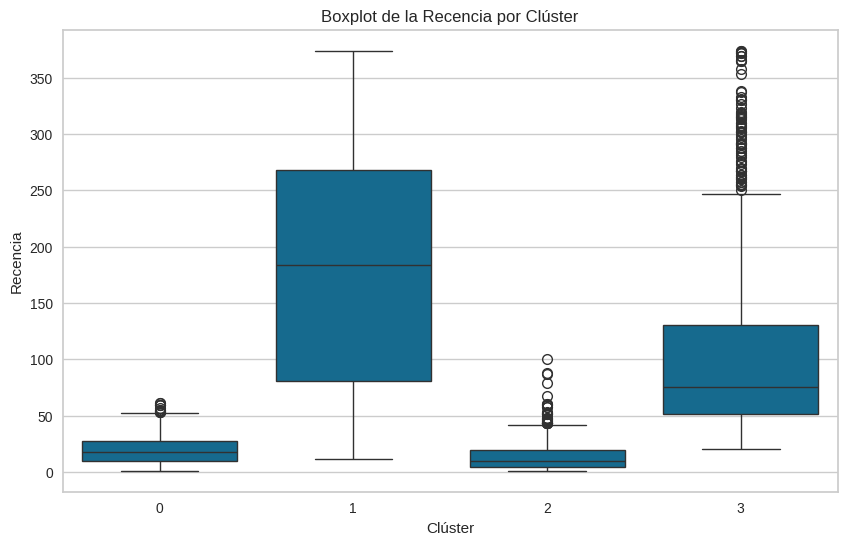

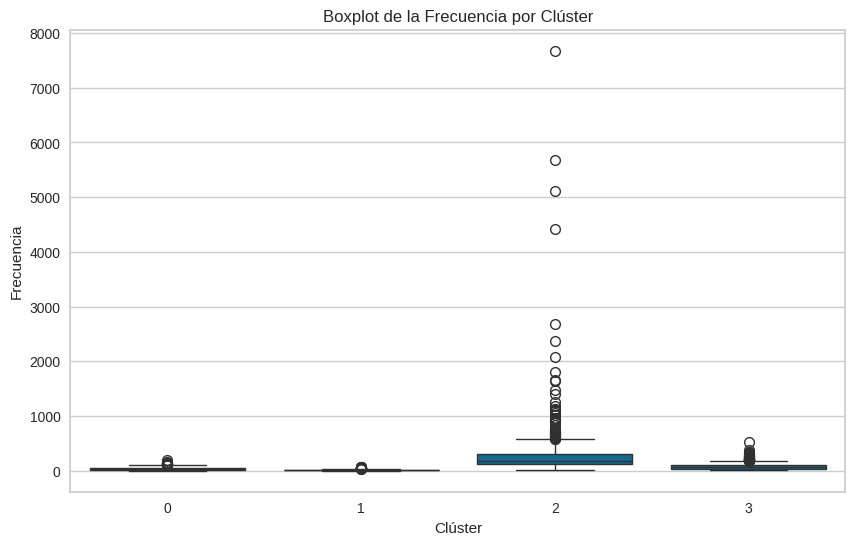

In [ ]:
# Boxplot por Clúster respecto a mi dataser sin normalizar

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='monetary', data=df_rfm1)
plt.title('Boxplot del Valor Monetario por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Valor Monetario')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='recency', data=df_rfm1)
plt.title('Boxplot de la Recencia por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Recencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='frequency', data=df_rfm1)
plt.title('Boxplot de la Frecuencia por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Frecuencia')
plt.show()